# **Price Optimisation of a Retail Store**

**Business Problem**

TrendElite is a clothing store that specializes in a diverse range of apparel and accessories. It operates both physical stores and an online e-commerce platform. The company aims to enhance its revenue and market competitiveness by optimizing its pricing strategy. The main goal is to set a price that not only brings in the most money but also draws in a good number of customers to purchase your products.

Start by thoroughly exploring the dataset, identifying key variables such as product attributes, customer behavior, and sales trends. Apply standard data preprocessing techniques to handle outliers, missing data, or duplicates.

Leverage descriptive statistics and visualizations to gain insights into data distribution and relationships.
Engineer new features such as Revenue and profit and profit margin for each prduct, time realted features such as isweekend, isholiday.

Employ pricing models, to predict optimal prices based on factors like production costs, demand elasticity, and competitor pricing.

Experiment with various pricing scenarios and assess their impact on revenue.

Utilize insights from the dataset to formulate a theoretical optimal pricing strategy and determine the most suitable price for each product.

Finally, select a pricing strategy aligned with business goals, considering market positioning, customer value perception, and profitability.

Present the recommended optimal prices for each product, accompanied by a clear explanation of the chosen strategy, addressing the challenges outlined in the case study.

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#dataset
!gdown 1scZmgvTw3AVG3LJAi4m4Pt1hipPJUB8I

Downloading...
From: https://drive.google.com/uc?id=1scZmgvTw3AVG3LJAi4m4Pt1hipPJUB8I
To: /content/price_optimsation_dataset.csv
100% 121k/121k [00:00<00:00, 46.8MB/s]


In [3]:
df = pd.read_csv('/content/price_optimsation_dataset.csv')

## Basic Data Exploration

In [4]:
df.head().T

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


In [5]:
df.shape

(676, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

**Dataset Description**

- **product_id:** A unique identifier for each product in the dataset.
- **product_category_name:** The name of the product category to which the product belongs.
- **month_year:** The month and year of the retail transaction or data recording.
- **qty:** The quantity of the product sold or purchased in a given transaction.
- **total_price:** The total price of the product, including any applicable taxes or discounts.Calculated using qty*unit_price
- **freight_price:** The average freight price associated with the product.
- **unit_price:** The average unit price of a single unit of the product.
- **product_name_length:** The length of the product name in terms of the number of characters.
- **product_description_length:** The length of the product description in terms of the number of characters.
- **product_photos_qty:** The number of photos available for the product in the dataset.
- **product_weight_g:** The weight of the product in grams.
- **product_score:** average product rating associated with the product’s quality, popularity, or other relevant factors.
- **customers:** The number of customers who purchased the product in a given category.
- **weekday:** Number of weekdays in that month.
- **weekend:** number of weekends in that month.
- **holiday:** Number of holidays in that month.
- **month:** The month in which the transaction occurred.
- **year:** The year in which the transaction occurred.
- **s:** the effect of seasonality
- **Volume:** Product Volume
- **Comp_1:** competitor1 price
- **Ps1:** competitor1 product rating
- **Fp1:** competitor1 freight price
- **Comp_2:** competitor2 price
- **Ps2:** competitor2 product rating
- **Fp2:** competitor2 freight price
- **Comp_3:** competitor3 price
- **Ps3:** competitor3 product rating
- **Fp3:** competitor3 freight price
- **Lag_price:** previous month price of the product

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
for i in df.columns:
  print(f'{df[i].nunique()} Unique values in {i}:\n{"-"*80}\n{df[i].unique()}\n')

52 Unique values in product_id:
--------------------------------------------------------------------------------
['bed1' 'garden5' 'consoles1' 'garden7' 'health9' 'cool4' 'health3'
 'perfumery1' 'cool5' 'health8' 'garden4' 'computers5' 'garden10'
 'computers6' 'health6' 'garden6' 'health10' 'watches2' 'health1'
 'garden8' 'garden9' 'watches6' 'cool3' 'perfumery2' 'cool2' 'computers1'
 'consoles2' 'health5' 'watches8' 'furniture4' 'watches5' 'health7' 'bed3'
 'garden3' 'bed2' 'furniture3' 'watches4' 'watches3' 'furniture2'
 'garden2' 'furniture1' 'health2' 'garden1' 'cool1' 'computers4'
 'watches7' 'computers3' 'health4' 'watches1' 'computers2' 'bed4' 'bed5']

9 Unique values in product_category_name:
--------------------------------------------------------------------------------
['bed_bath_table' 'garden_tools' 'consoles_games' 'health_beauty'
 'cool_stuff' 'perfumery' 'computers_accessories' 'watches_gifts'
 'furniture_decor']

20 Unique values in month_year:
------------------------

## Feature Engineering

In [10]:
df['total_price'] = df['qty'] * df['unit_price']

In [11]:
cols = ['product_id',	'product_category_name',	'qty',	'total_price',	'freight_price',	'unit_price', 'comp_1', 'comp_2', 'comp_3', 'fp1', 'fp2', 'fp3']
df[cols].head()

,product_id,product_category_name,qty,total_price,freight_price,unit_price,comp_1,comp_2,comp_3,fp1,fp2,fp3
0,bed1,bed_bath_table,1,45.95,15.100000,45.95,89.9,215.000000,45.95,15.011897,8.760000,15.100000
1,bed1,bed_bath_table,3,137.85,12.933333,45.95,89.9,209.000000,45.95,14.769216,21.322000,12.933333
2,bed1,bed_bath_table,6,275.70,14.840000,45.95,89.9,205.000000,45.95,13.993833,22.195932,14.840000
3,bed1,bed_bath_table,4,183.80,14.287500,45.95,89.9,199.509804,45.95,14.656757,19.412885,14.287500
4,bed1,bed_bath_table,2,91.90,15.100000,45.95,89.9,163.398710,45.95,18.776522,24.324687,15.100000


- To calculate estimated cost price (est_cost_price), Let's assume cost price should be same across competitors and minimum of 25% profit margin should be taken for each product by competitors.

- unit_price = (est_cost_price + freight_price + unit_profit) per each item
- total_price = qty * unit_price
- total_price = qty * (est_cost_price + freight_price + unit_profit)

- est_cost_price = unit_price - freight_price - unit_profit

- unit_price => minimum unit price among competitors
- freight_price => frieght price of competitor having minimum unit price
- unit_profit => 25% of minimum unit price

- total_price = (qty * est_cost_price) + (qty * freight_price) + (qty * unit_profit)
- (qty * unit_profit) = total_price - (qty * est_cost_price) - (qty * freight_price)

- qty * unit_profit => profit
- profit = total_price - qty * (est_cost_price + freight_price)

In [12]:
# minimum price
def min_price(row):
  return row[['comp_1', 'comp_2', 'comp_3']].min()

# frieght price of minimum price competitor
def min_comp_fp(row):
  i = np.argmin(row[['comp_1', 'comp_2', 'comp_3']])
  return row[['fp1', 'fp2', 'fp3']].iloc[i]

# Competitor's profit = df.apply(min_price, axis=1) * 0.25

# Estimated Cost Price (same accross competitors including us)
df['est_cost_price'] = df.apply(min_price, axis=1) - df.apply(min_comp_fp, axis=1) - (df.apply(min_price, axis=1) * 0.25)

# Our profit
df['profit'] = df['total_price'] - (df['qty'] * (df['freight_price'] + df['est_cost_price']))

In [189]:
df[df['freight_price'] > df['unit_price']]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps3,fp3,lag_price,est_cost_price,profit,profit_margin,qty_change,price_change,price_elasticity,season
518,garden2,garden_tools,01-03-2018,2,107.8,62.27,53.9,59,341,2,...,4.1,19.024231,51.233333,20.065323,-56.870645,-0.527557,-0.5,0.052049,-9.60625,Spring


In [13]:
# Profit margin
df['profit_margin'] = df['profit'] / df['total_price']
df['profit_margin'].fillna(0, inplace=True)

In [14]:
df['qty_change'] = df.groupby('product_id')['qty'].pct_change().fillna(0)
df['price_change'] = (df['unit_price'] - df['lag_price']) / df['lag_price']

# Compute price elasticity
df['price_elasticity'] = np.where(df['price_change'] == 0, 0, df['qty_change'] / df['price_change'])

In [15]:
df.rename({'weekday':'num_weekdays_month', 'weekend':'num_weekends_month', 'holiday':'num_holidays_month'}, axis=1, inplace=True)

In [16]:
# Create Season Feature (assuming USA)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.000000
total_price,676.0,1422.220453,1699.375345,19.900000,333.700000,807.890000,1887.322500,12095.000000
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.760000
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.000000
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.000000
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.000000
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.000000
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.000000
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.500000
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.000000


- **`qty`** → Highly variable sales; some products sell in high volumes (Max = 122), while others have low demand.  
- **`unit_price`** → Prices range from USD 19.90 to USD 364, suggesting a mix of budget and premium products.  
- **`total_price`** → Some transactions contribute significantly to revenue (Max = USD 12,095), likely from bulk purchases.   
- **`profit`** → Some products are **sold at a loss** (Min = -USD 115.9), requiring price adjustments.  
- **`profit_margin`** → Average **42% margin**, but some products have extreme **high margins (~95%)**, indicating possible underestimation of costs.   
- **`price_elasticity`** → Mean = **123.1**, but extreme values (-8842 to 44175) suggest **outliers that need removal**.  
- **`customers`** → Some products attract **many customers (Max = 339)**, while others have low reach.  
- **`freight_price`** → Some products have **very high shipping costs (Max = USD 79.76)**, impacting profit margins.  
- **`estimated_cost`** → Average estimated cost is **USD 47.5**, but some products have **very low costs (~USD 15)**, leading to high profit margins.  
- **`comp_1`, `comp_2`, `comp_3`** → Competitor prices are in a **similar range (USD 80-90 avg)**, indicating a competitive market.   
- **`num_weekends_month`** → Most months have **8-9 weekends**, meaning weekend sales analysis might be useful.  
- **`num_holidays_month`** → Some months have **0-4 holidays**, suggesting potential seasonal effects.

In [18]:
df.describe(include='object')

,product_id,product_category_name,month_year,season
count,676,676,676,676
unique,52,9,20,4
top,health7,garden_tools,01-03-2018,Summer
freq,20,160,50,215


- **`product_id`** → **52 unique products**, with the most frequent product (`health7`) appearing **20 times**, indicating high availability or demand.  
- **`product_category_name`** → **9 unique categories**, with `garden_tools` being the most common (**160 occurrences**), suggesting strong sales in this category.
- **`month_year`** → **20 unique months**, with `March 2018` having more transactions (**50 transactions**).
- **`season`** → **4unique seasons**, with `Summer` being the most frequent (**215 records**), indicating most sales activity during this period.

## Exploratory Data Analysis

### Distribution Check

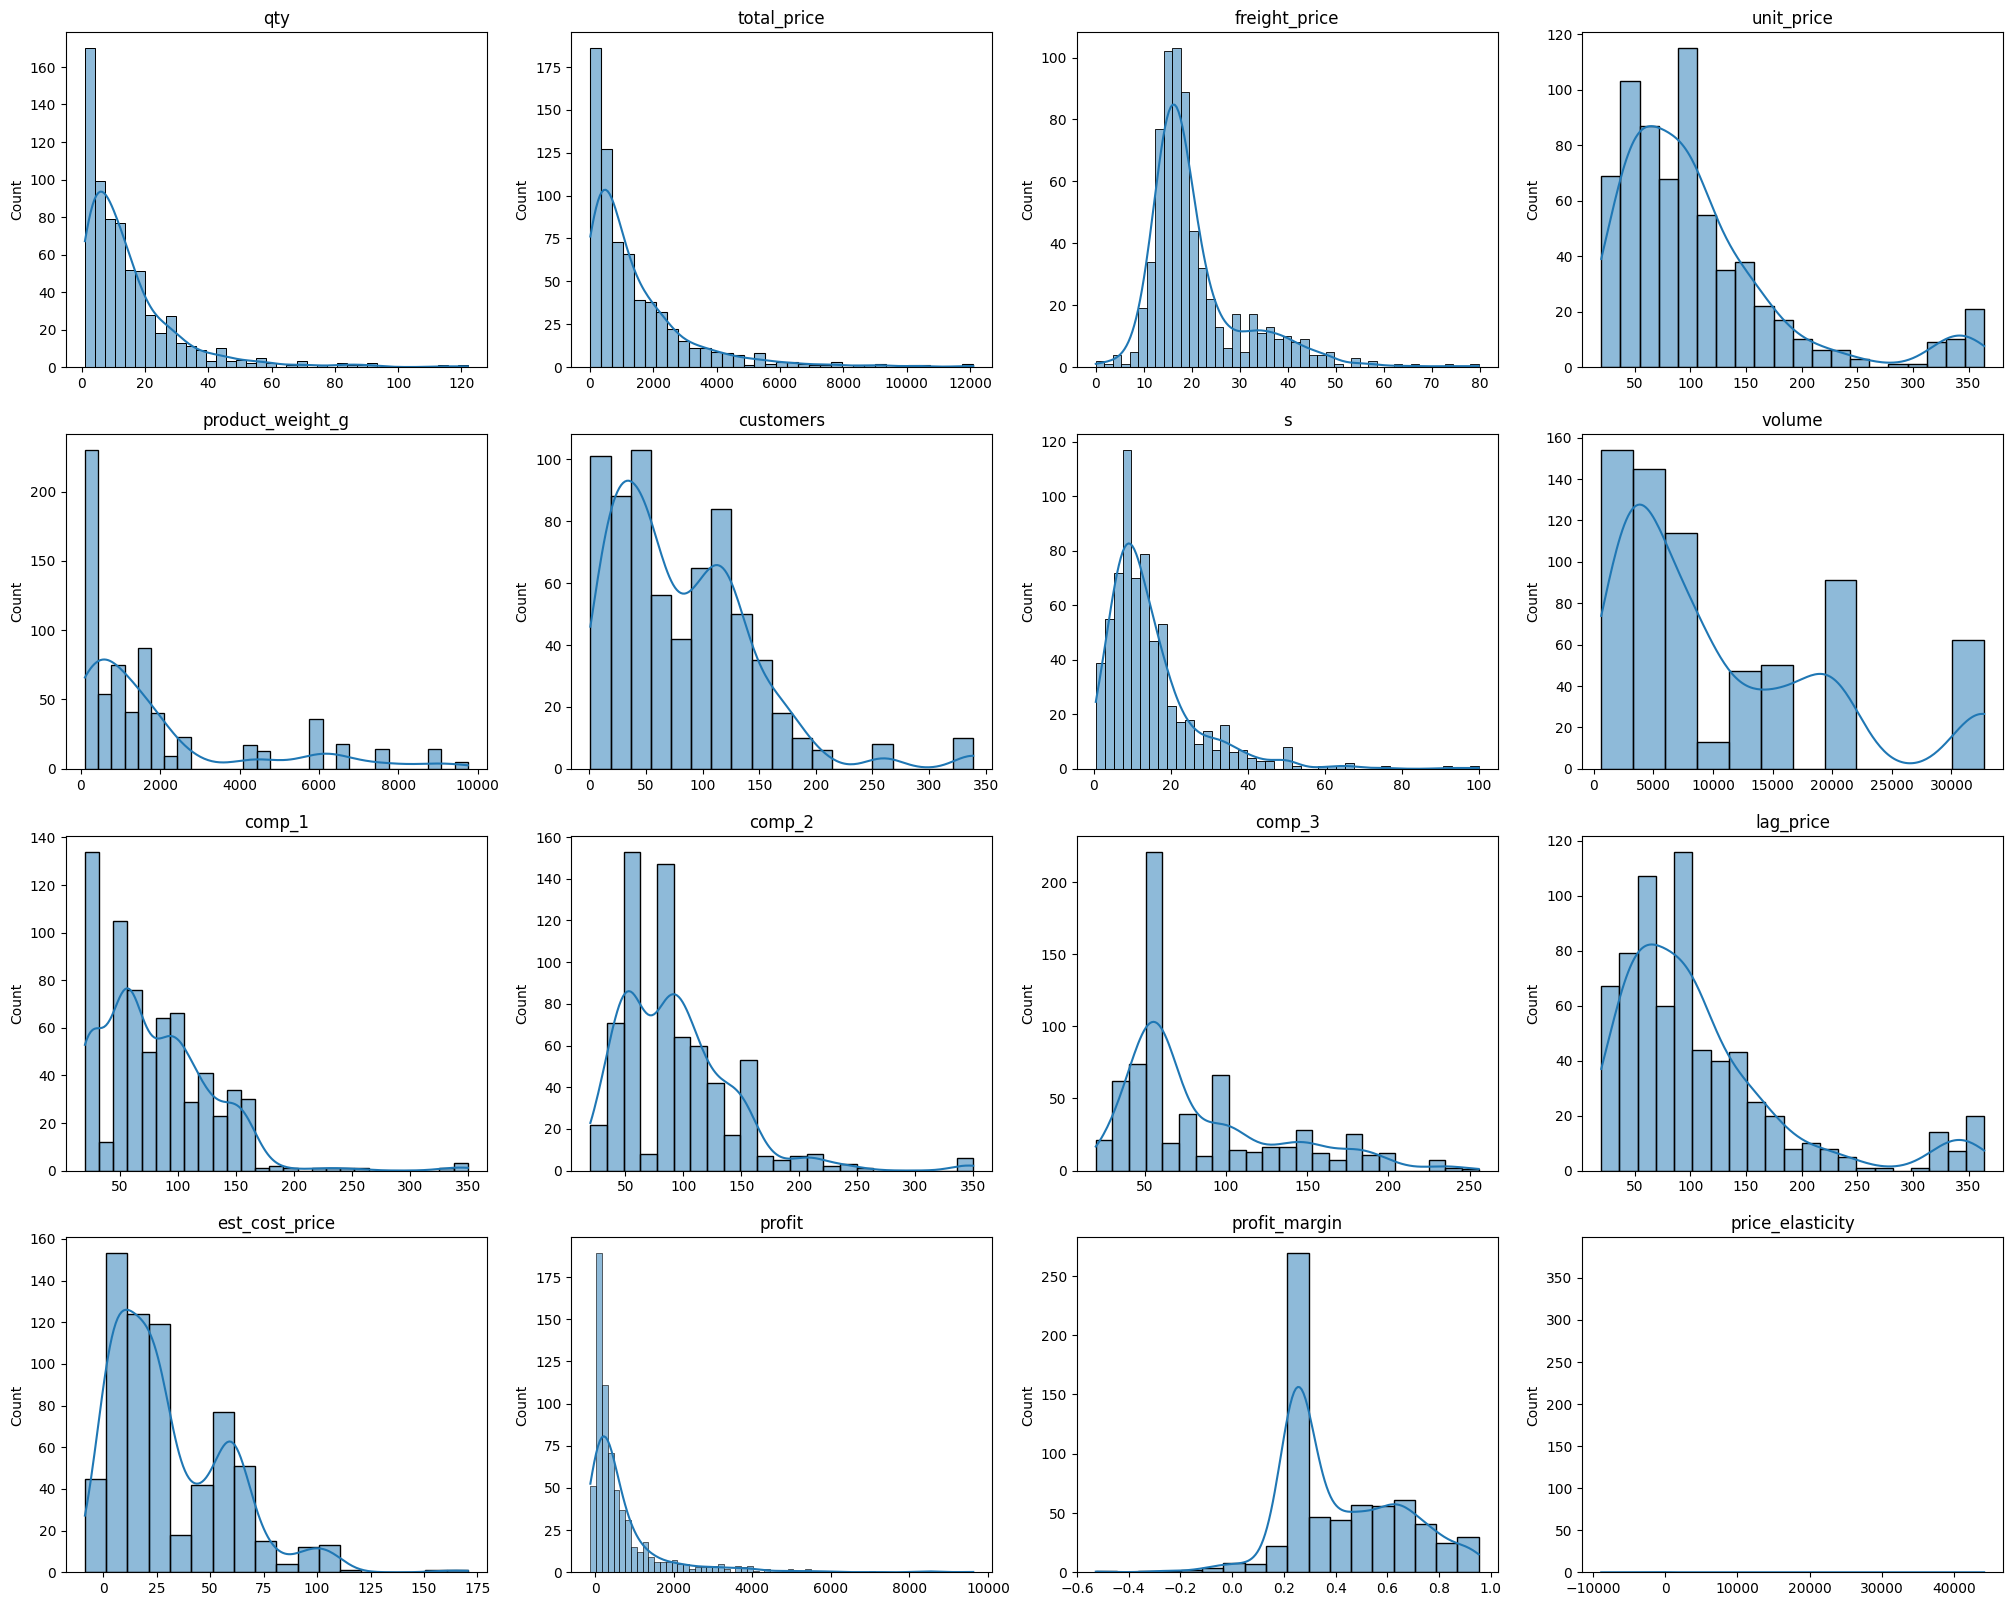

In [19]:
cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_weight_g',
    'customers', 's', 'volume', 'comp_1', 'comp_2', 'comp_3', 'lag_price',
    'est_cost_price', 'profit', 'profit_margin', 'price_elasticity']

plt.figure(figsize=(25,20))
for i, col in enumerate(cols):
  plt.subplot(4,4,i+1)
  sns.histplot(data=df, x=col, kde=True)
  plt.xlabel('')
  plt.title(col)
plt.show()

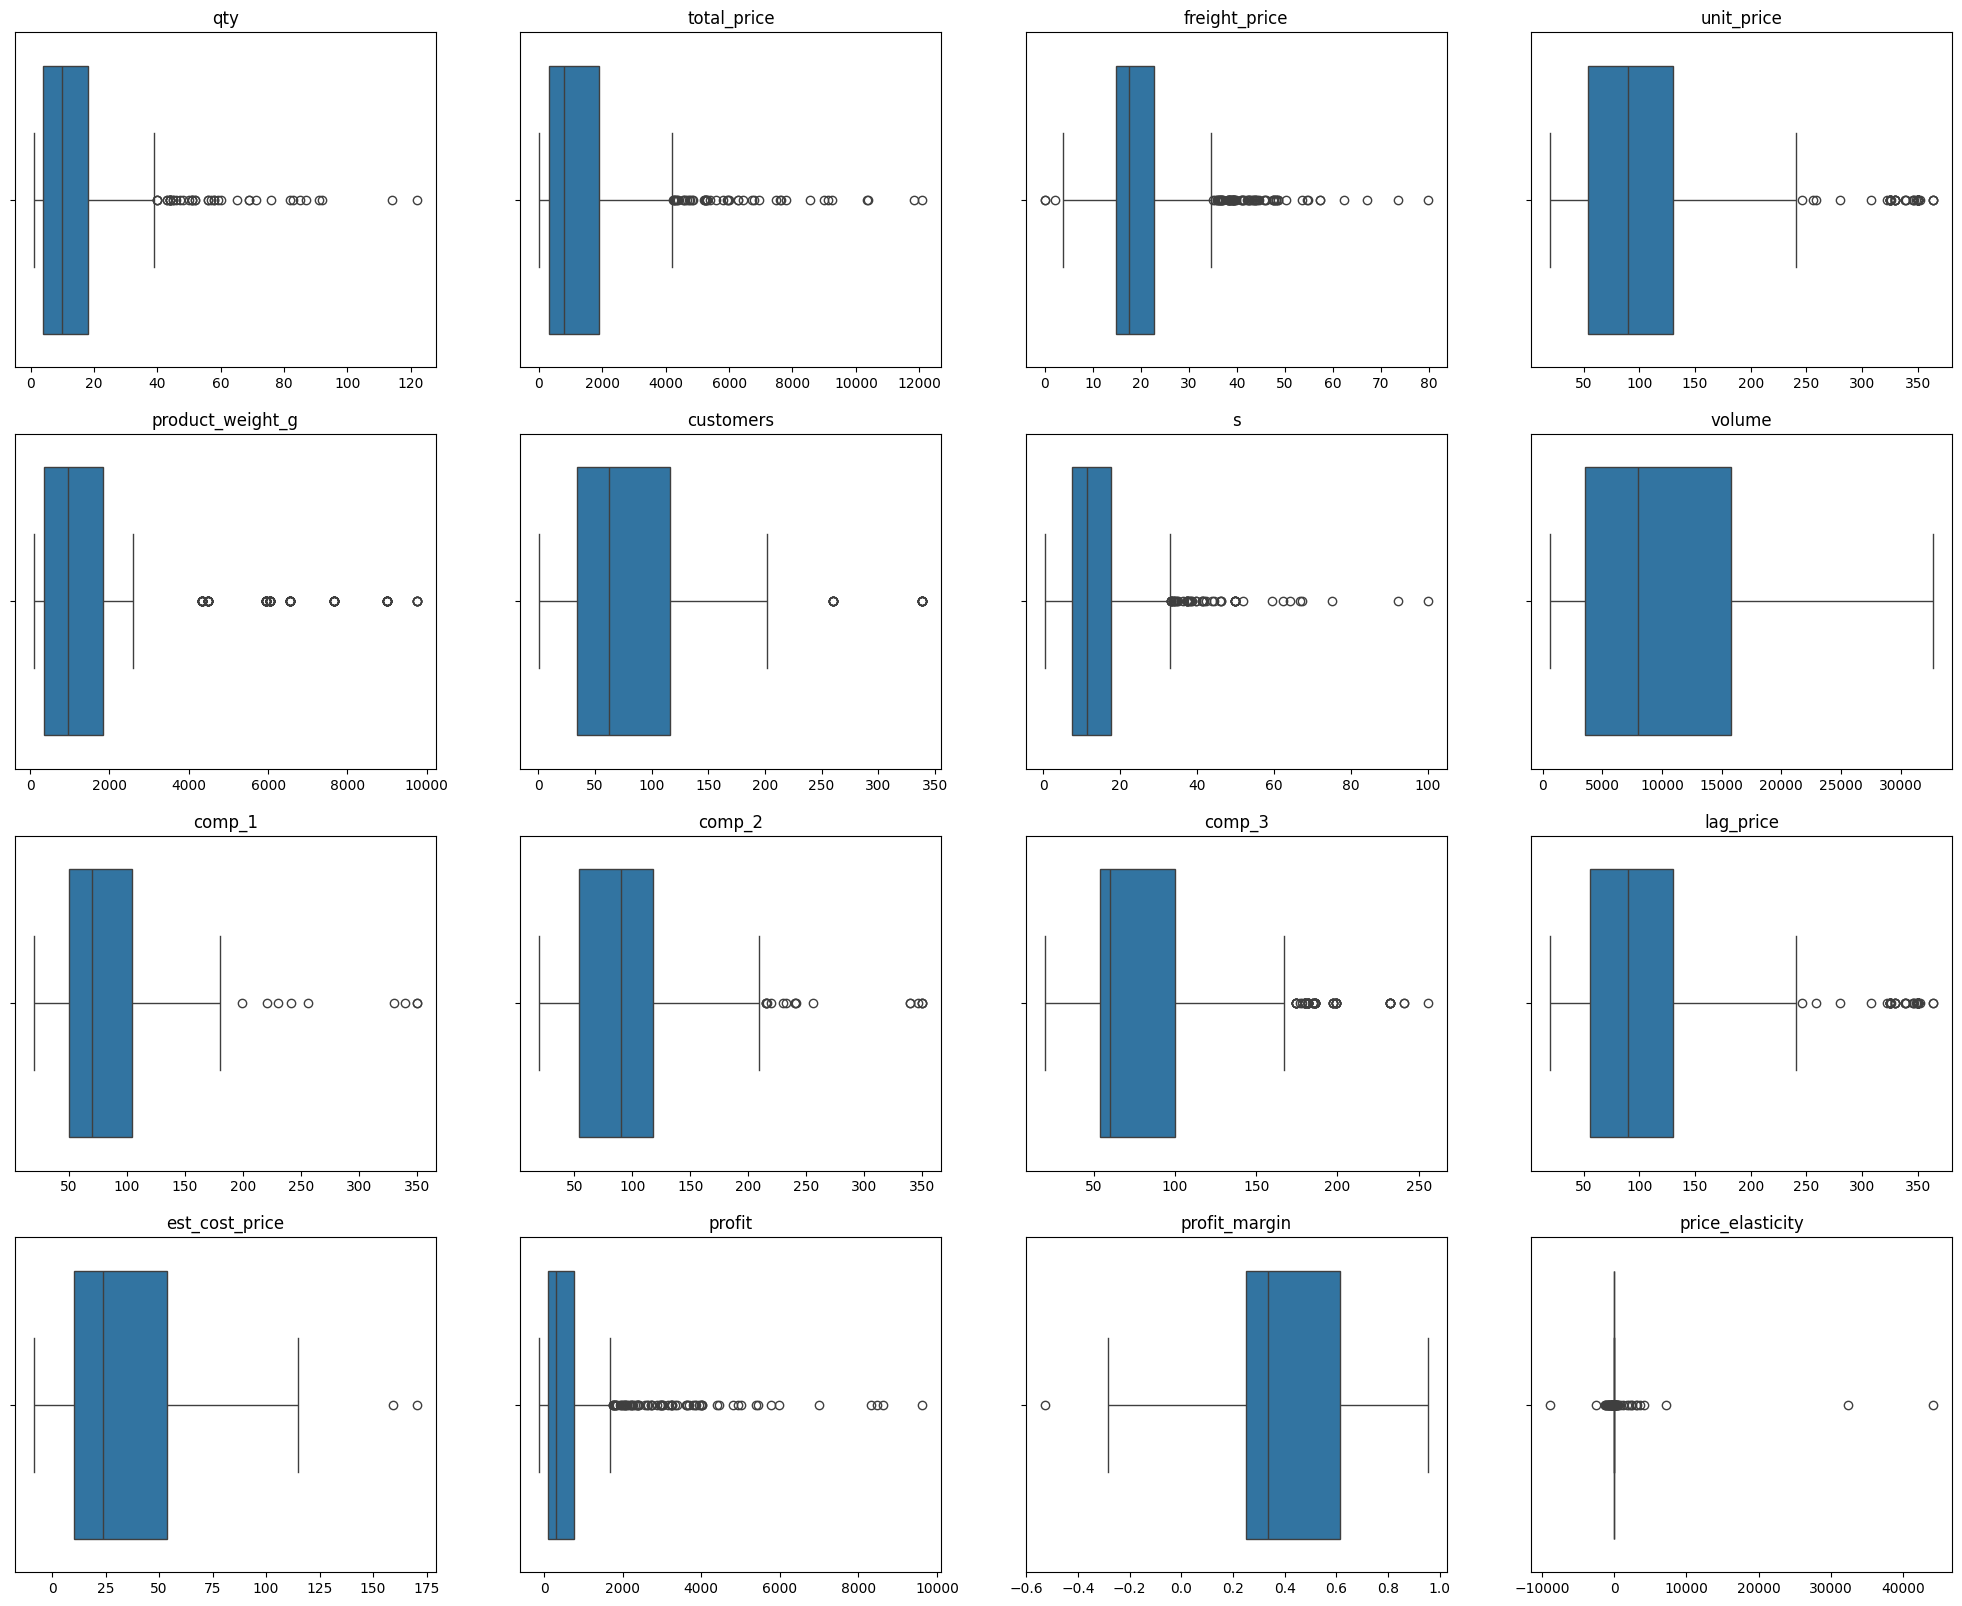

In [20]:
cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_weight_g',
    'customers', 's', 'volume', 'comp_1', 'comp_2', 'comp_3', 'lag_price',
    'est_cost_price', 'profit', 'profit_margin', 'price_elasticity']

plt.figure(figsize=(25,20))
for i, col in enumerate(cols):
  plt.subplot(4,4,i+1)
  sns.boxplot(data=df, x=col)
  plt.xlabel('')
  plt.title(col)
plt.show()

- Features `qty`, `total_price`, `freight_price`, `unit_price`, `product_weight_g`, `s`, `comp_1`, `comp_2`, `comp_3`, `lag_price`, `est_cost_price` and `profit` are `right skewed` and so we have to apply log transformation.

- For `customers`, `price_elasticity`, and `profit_margin`, extreme values exist but are still relevant to the data distribution. So we can use Winsorization for these columns.
  

### Product Category Analysis

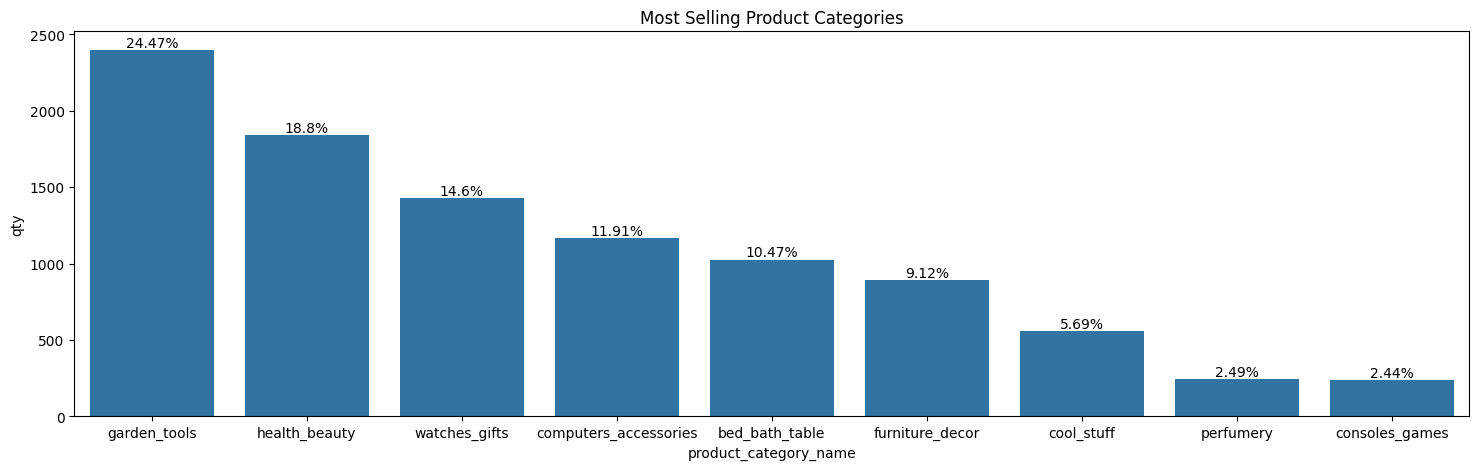

In [21]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_category_name')['qty'].sum().sort_values(ascending=False).head(10).reset_index(),
            x='product_category_name', y='qty')
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), str(round(i.get_height()/df['qty'].sum()*100,2))+'%', ha='center', va='bottom')
plt.title('Most Selling Product Categories')
plt.show()

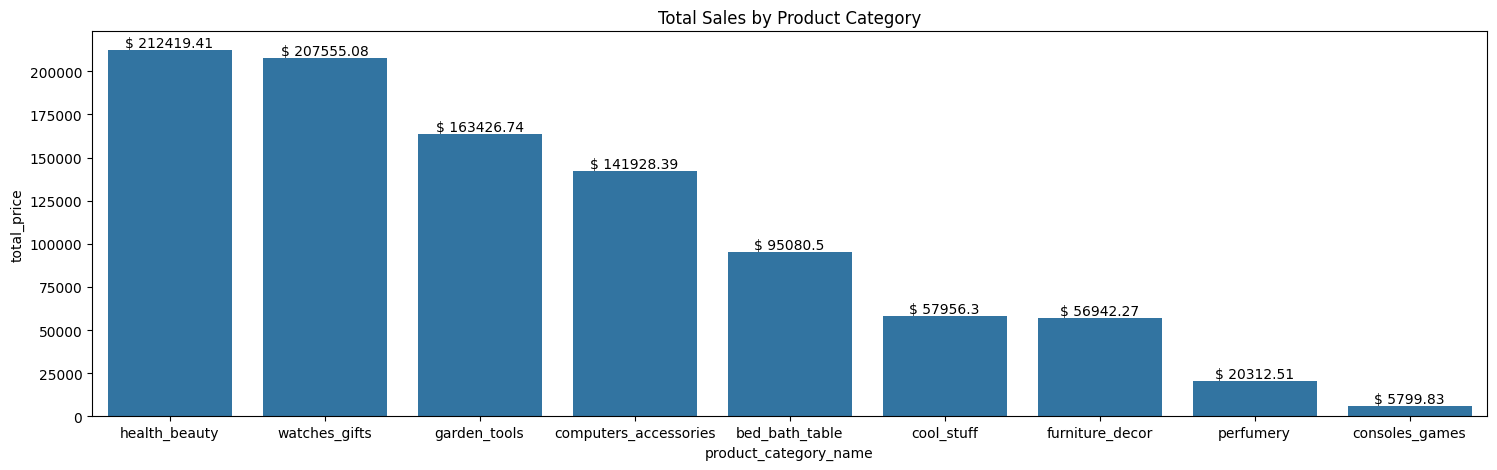

In [22]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False).reset_index(),
                x="product_category_name", y="total_price")
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '$ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title("Total Sales by Product Category")
plt.show()

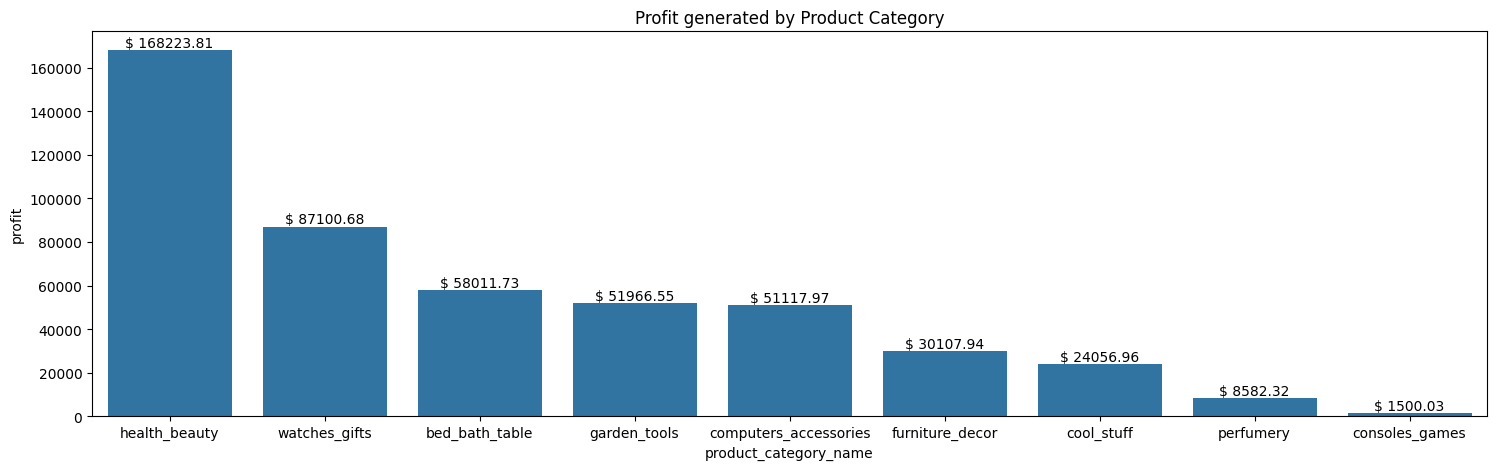

In [23]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_category_name')['profit'].sum().sort_values(ascending=False).head(10).reset_index(),
                x="product_category_name", y="profit")
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '$ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title('Profit generated by Product Category')
plt.show()

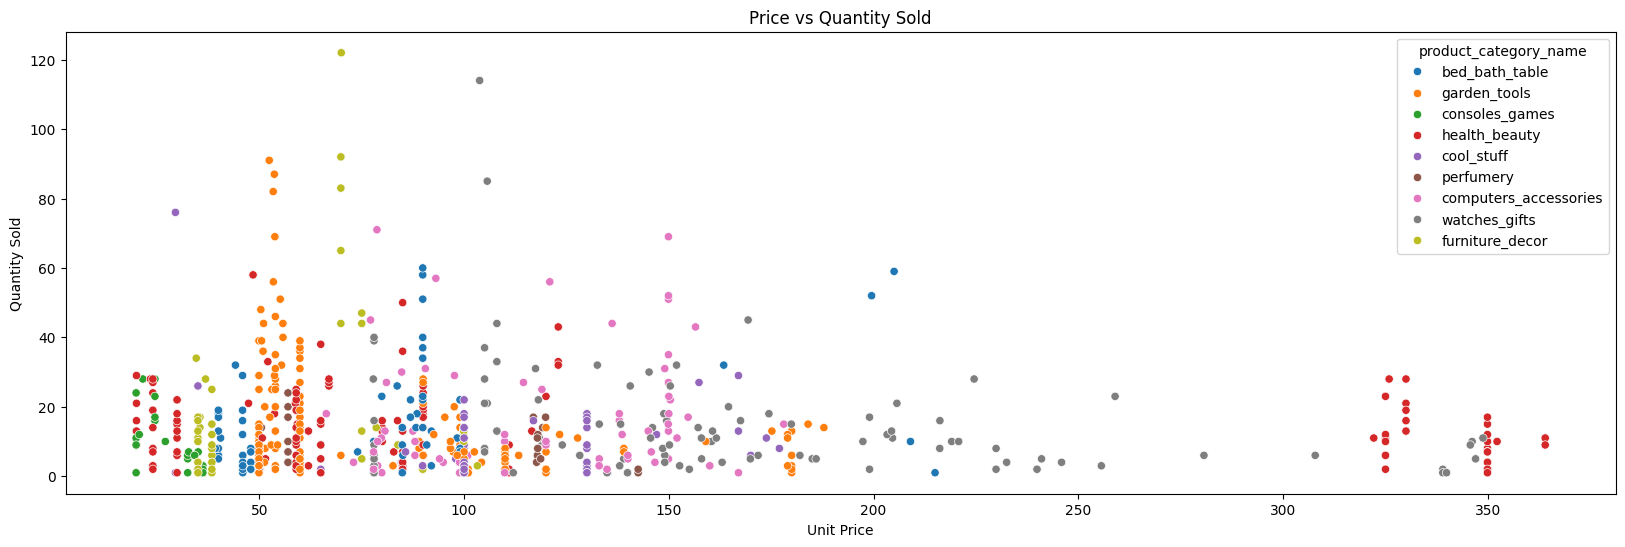

In [24]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='unit_price', y='qty', hue='product_category_name', alpha=1.0)
plt.title("Price vs Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.show()

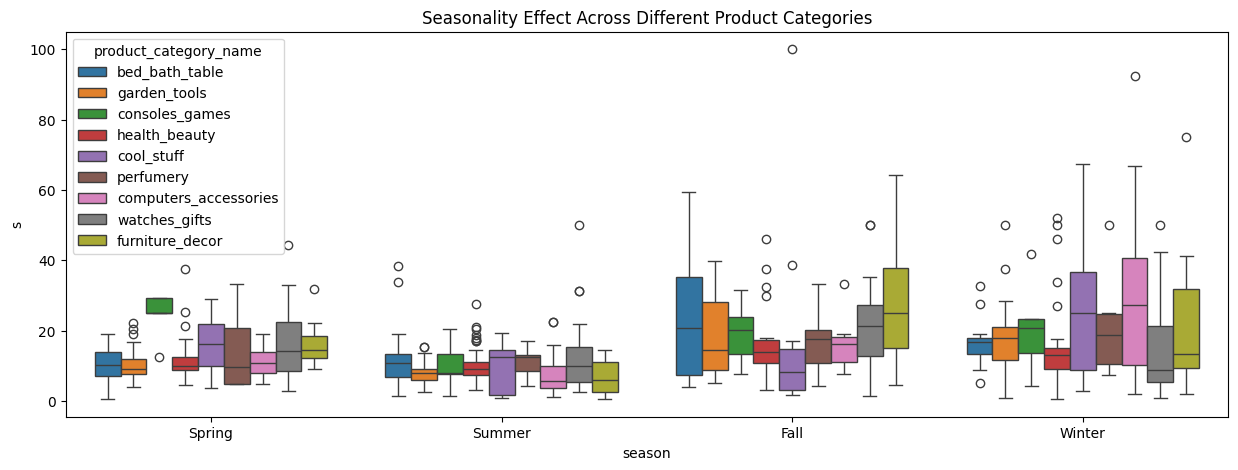

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['season'], y=df['s'], hue=df['product_category_name'])
plt.title("Seasonality Effect Across Different Product Categories")
plt.show()

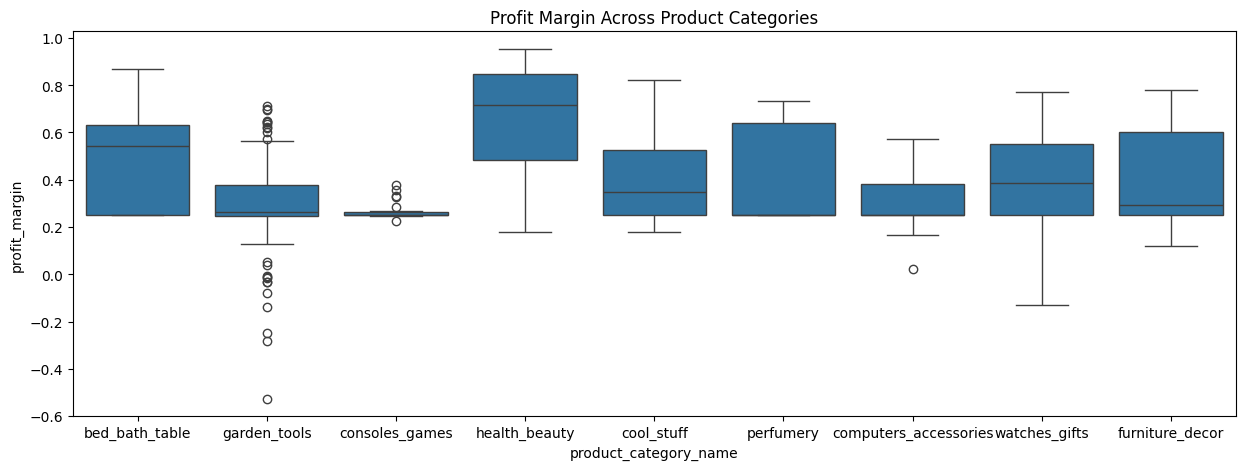

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['product_category_name'], y=df['profit_margin'])
plt.title("Profit Margin Across Product Categories")
plt.show()

- **Most Selling Product Categories:**` Garden Tools` had the highest quantity sold (24.47%), but high volume does not always mean high revenue.  
- **Total Sales by Product Category:** `Health & Beauty` had the highest revenue (USD 212,409.24), outperforming `Garden Tools` despite lower sales volume.  
- **Profit Generated by Product Category:** `Health & Beauty` also led in profit (USD 174,661.80), showing strong pricing power and margins.  
- **Price vs Quantity Sold:** Lower-priced items had higher sales, while premium products had select high sales, indicating brand loyalty or niche demand.  
- **Seasonality Effect on Sales:** Seasonality impacts product categories differently, with higher variability in demand during **Fall and Winter**, especially for **furniture_decor, watches_gifts, and computers_accessories**, indicating seasonal shopping trends.
- **Profit Margin Across Categories:**` Health & Beauty` and `Consoles & Games` had the highest profit margins, while `Garden Tools` had lower margins despite high sales.

### Product Analysis

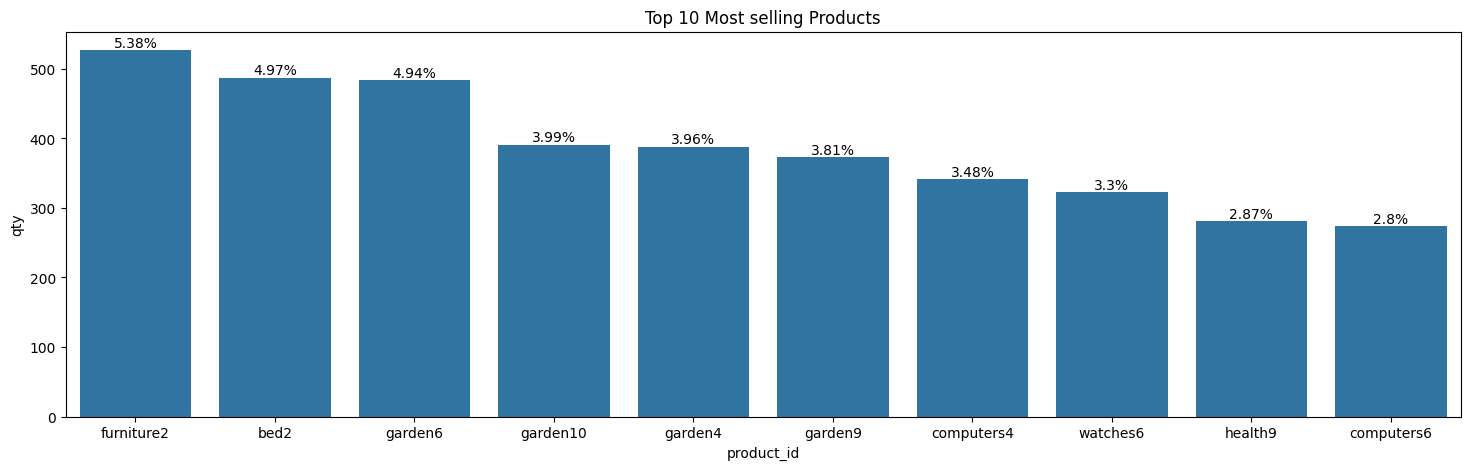

In [27]:
plt.figure(figsize=(18, 5))
p = sns.barplot(data=df.groupby('product_id')['qty'].sum().sort_values(ascending=False).head(10).reset_index(),
            x='product_id', y='qty')
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), str(round(i.get_height()/df.qty.sum()*100,2))+'%', ha='center', va='bottom')
plt.title('Top 10 Most selling Products')
plt.show()

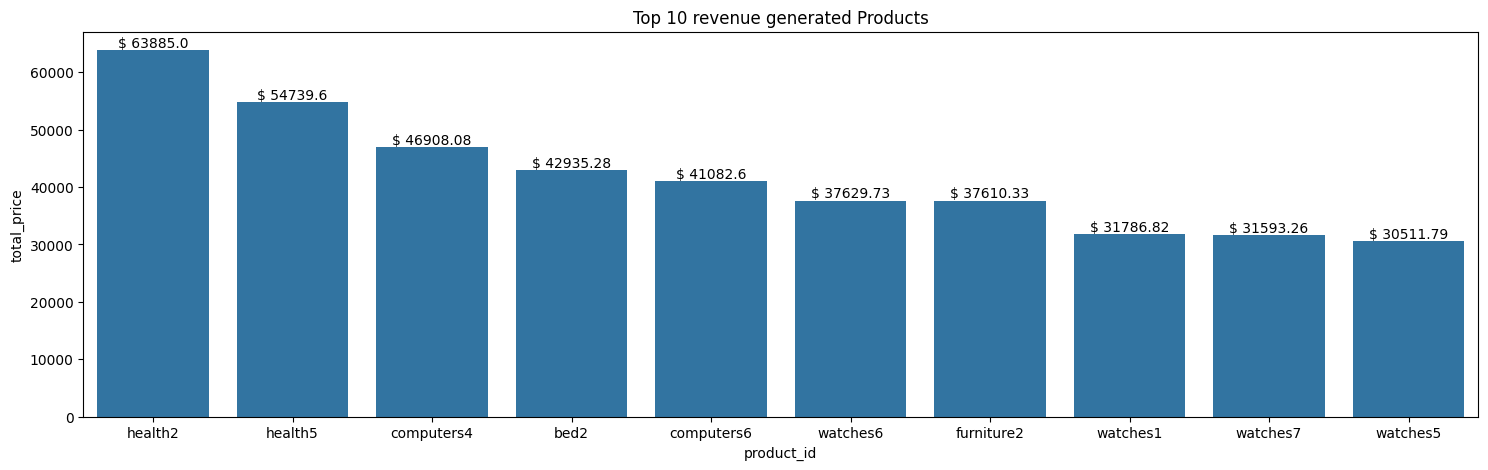

In [28]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(10).reset_index(),
                x="product_id", y="total_price")
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '$ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title('Top 10 revenue generated Products')
plt.show()

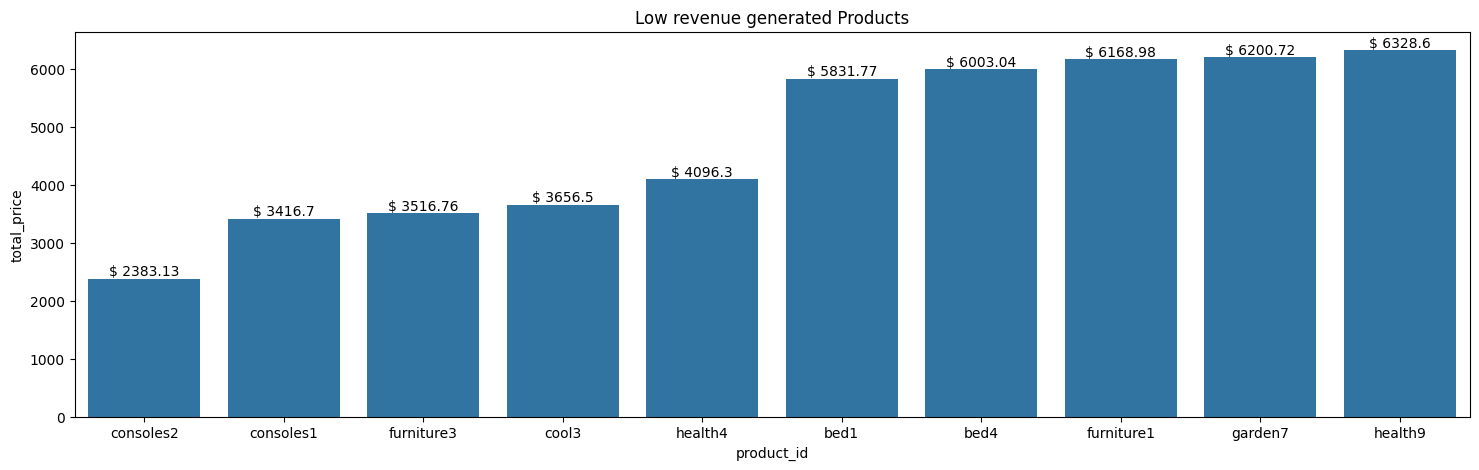

In [29]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_id')['total_price'].sum().sort_values().head(10).reset_index(),
                x="product_id", y="total_price")
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '$ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title('Low revenue generated Products')
plt.show()

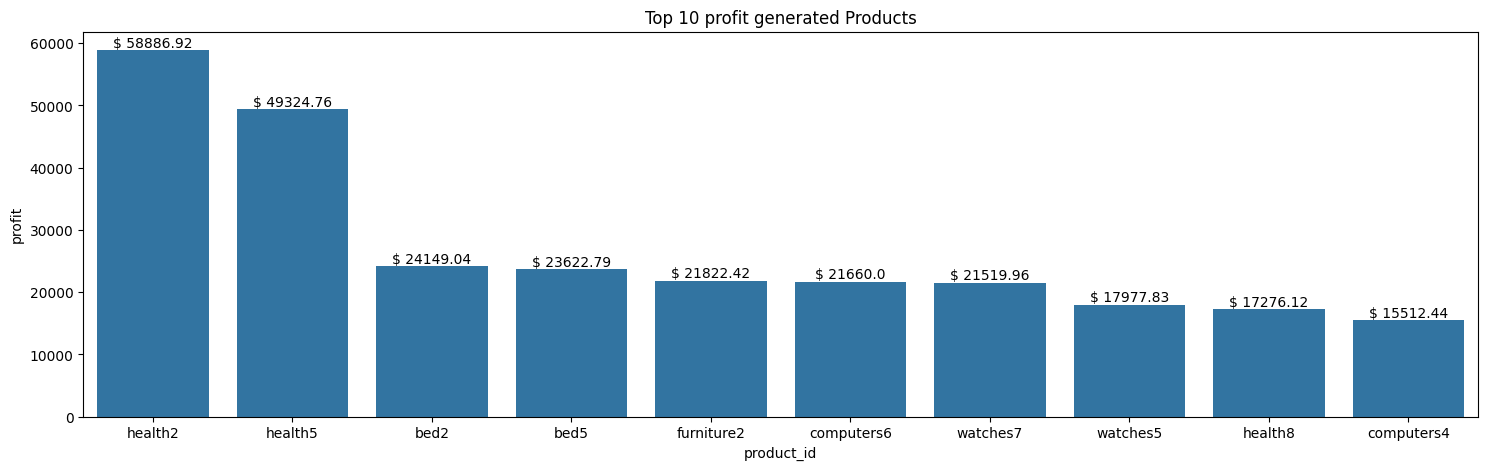

In [30]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_id')['profit'].sum().sort_values(ascending=False).head(10).reset_index(),
                x="product_id", y="profit")
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '$ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title('Top 10 profit generated Products')
plt.show()

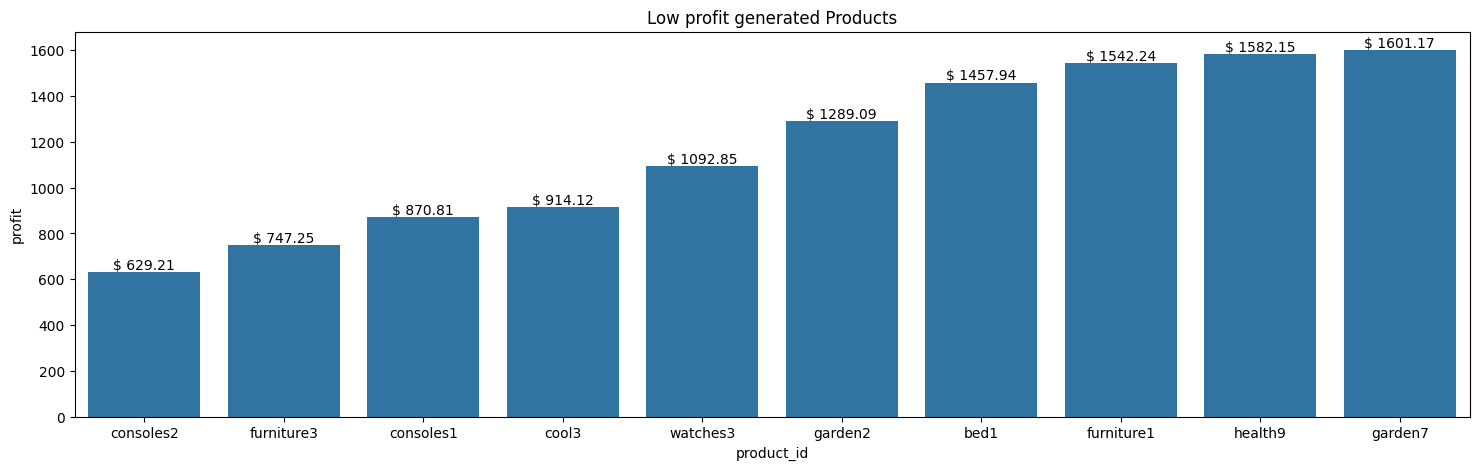

In [31]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('product_id')['profit'].sum().sort_values().head(10).reset_index(),
                x="product_id", y="profit")
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '$ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title('Low profit generated Products')
plt.show()

- **Top Selling Products:** `furniture2` had the highest quantity sold (5.38%), followed by `bed2` and `garden6`.  
- **Top Revenue Generating Products:** `health2` generated the highest revenue (USD 63,885), followed by `health5` and `computers4`.  
- **Low Revenue Products:** "consoles2" had the lowest revenue (USD 2,384), followed by `consoles1` and `furniture3`.  
- **Top Profit Generating Products:** `health2` led in profit (USD 59,576.04), followed by `health5` and `bed2`.  
- **Low Profit Products:** `watches3` had the lowest profit (USD 81.06), followed by `consoles2` and `furniture3`.

#### Price Elasticity of Demand

In [32]:
prod_ped = df.groupby('product_id')['price_elasticity'].median().reset_index()

In [33]:
prod_ped[prod_ped['price_elasticity']==1].product_id.unique()

array([], dtype=object)

In [34]:
prod_ped[prod_ped['price_elasticity']<1].product_id.unique()

array(['bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'computers1', 'computers2',
       'computers3', 'computers4', 'computers5', 'computers6',
       'consoles1', 'consoles2', 'cool1', 'cool2', 'cool3', 'cool4',
       'cool5', 'furniture1', 'furniture2', 'furniture3', 'furniture4',
       'garden1', 'garden10', 'garden2', 'garden3', 'garden4', 'garden5',
       'garden6', 'garden7', 'garden8', 'garden9', 'health1', 'health10',
       'health2', 'health3', 'health4', 'health5', 'health6', 'health7',
       'health8', 'health9', 'perfumery1', 'perfumery2', 'watches1',
       'watches2', 'watches3', 'watches4', 'watches5', 'watches6',
       'watches8'], dtype=object)

In [35]:
prod_ped[prod_ped['price_elasticity']>1].product_id.unique()

array(['watches7'], dtype=object)

In [36]:
prod_ped[prod_ped['price_elasticity']<0]

,product_id,price_elasticity
33,health10,-6.375098
44,watches1,-7.138896
45,watches2,-8.809153
48,watches5,-2.331641
49,watches6,-11.816968
51,watches8,-3.487332


In [37]:
prod_ped[prod_ped['price_elasticity']>1]

,product_id,price_elasticity
50,watches7,8.184334


- `watches7` is the only elastic product with the `elasticity of 8.184334` where small price increase will result in decrease of the demand.
- All the other products are inelastic when price change doesn't impact the demand.

### Quantity Analysis

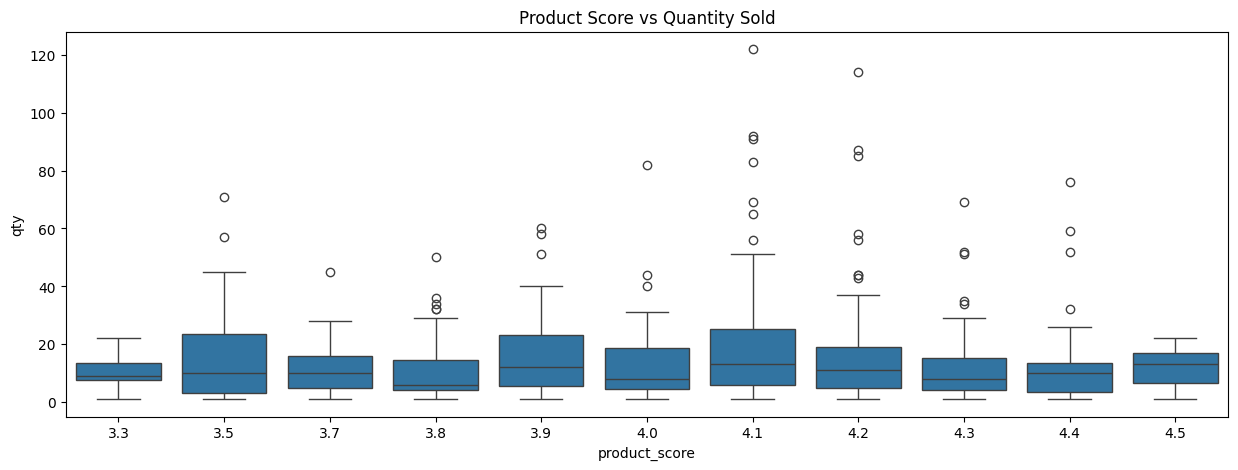

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='product_score', y='qty')
plt.title('Product Score vs Quantity Sold')
plt.show()

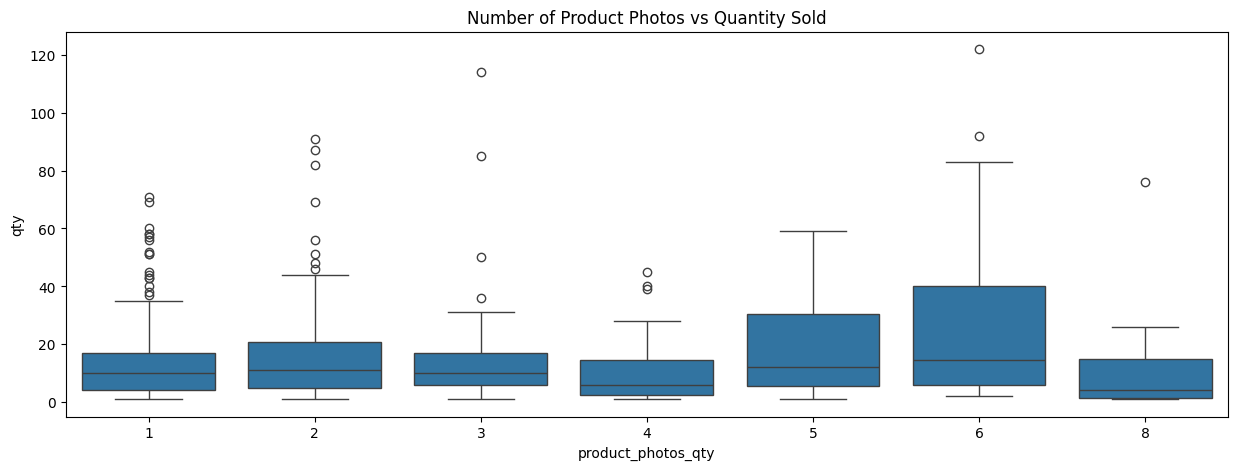

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='product_photos_qty', y='qty')
plt.title('Number of Product Photos vs Quantity Sold')
plt.show()

- **Product Score vs Quantity Sold:** Higher product scores (`above 4.0`) generally show a wider range of sales, but lower-scoring products also have outliers with high sales.  
- **Number of Product Photos vs Quantity Sold:** Products with more photos (`5-6`) tend to have higher sales, but there are outliers at all levels.

### Competition Analysis

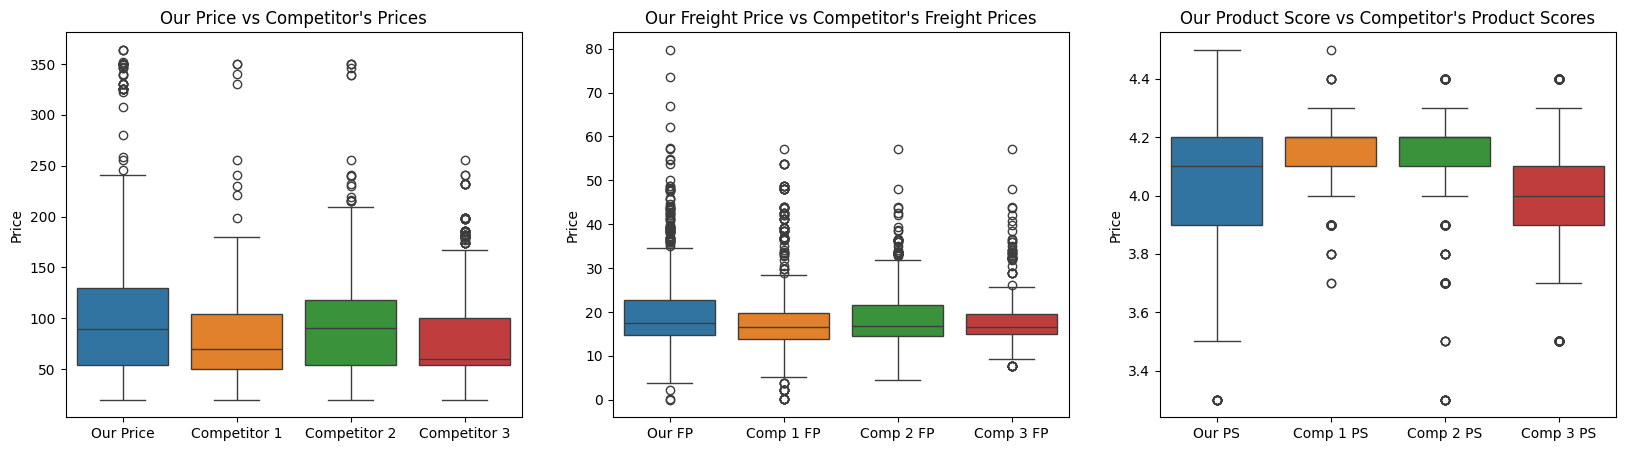

In [40]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.boxplot(data=df[['unit_price', 'comp_1', 'comp_2', 'comp_3']])
plt.title("Our Price vs Competitor's Prices")
plt.ylabel("Price")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Our Price", "Competitor 1", "Competitor 2", "Competitor 3"])

plt.subplot(1,3,2)
sns.boxplot(df[['freight_price', 'fp1', 'fp2', 'fp3']])
plt.title("Our Freight Price vs Competitor's Freight Prices")
plt.ylabel("Price")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Our FP", "Comp 1 FP", "Comp 2 FP", "Comp 3 FP"])

plt.subplot(1,3,3)
sns.boxplot(df[['product_score', 'ps1', 'ps2', 'ps3']])
plt.title("Our Product Score vs Competitor's Product Scores")
plt.ylabel("Price")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Our PS", "Comp 1 PS", "Comp 2 PS", "Comp 3 PS"])

plt.show()

- **Our Price vs Competitor's Prices:** Our prices have a wider distribution, with higher maximum values and more outliers compared to competitors.  
- **Our Freight Price vs Competitor's Freight Prices:** Our freight prices tend to be higher on average, with more outliers at the upper end.  
- **Our Product Score vs Competitor's Product Scores:** Our product scores are competitive, with a similar median to competitors but slightly more variation.

### Seasonality Analysis

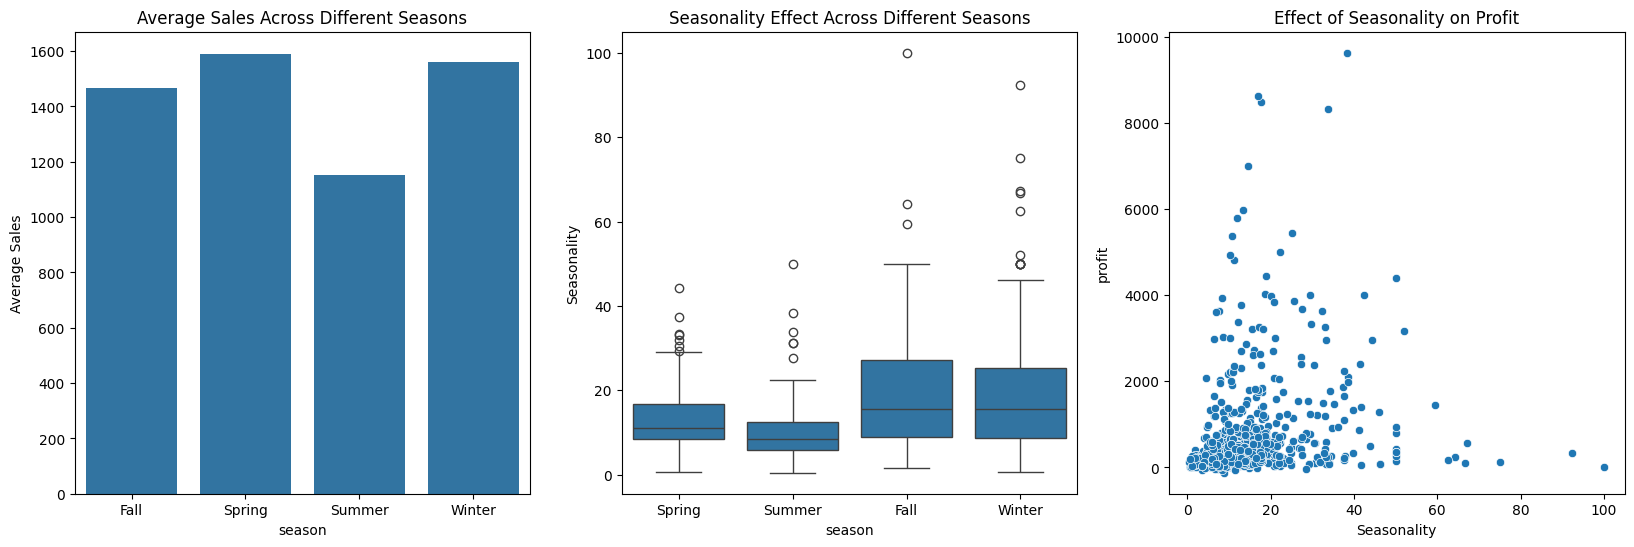

In [41]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sns.barplot(data=df.groupby('season')['total_price'].mean().reset_index(),
            x='season', y='total_price')
plt.title("Average Sales Across Different Seasons")
plt.ylabel("Average Sales")

plt.subplot(1,3,2)
sns.boxplot(x=df['season'], y=df['s'])
plt.title("Seasonality Effect Across Different Seasons")
plt.ylabel("Seasonality")

plt.subplot(1,3,3)
sns.scatterplot(x=df['s'], y=df['profit'])
plt.title("Effect of Seasonality on Profit")
plt.xlabel("Seasonality")

plt.show()

- **Average Sales Across Seasons:** `Sales peak in Spring and Winter`, while Summer sees the lowest sales.  
- **Seasonality Effect Across Seasons:** Seasonality `impact is higher in Fall and Winter`, with greater variability.  
- **Effect of Seasonality on Profit:** `Higher seasonality tends to correlate with higher profits`, but some low-seasonality products still generate substantial revenue.

### Price Analysis

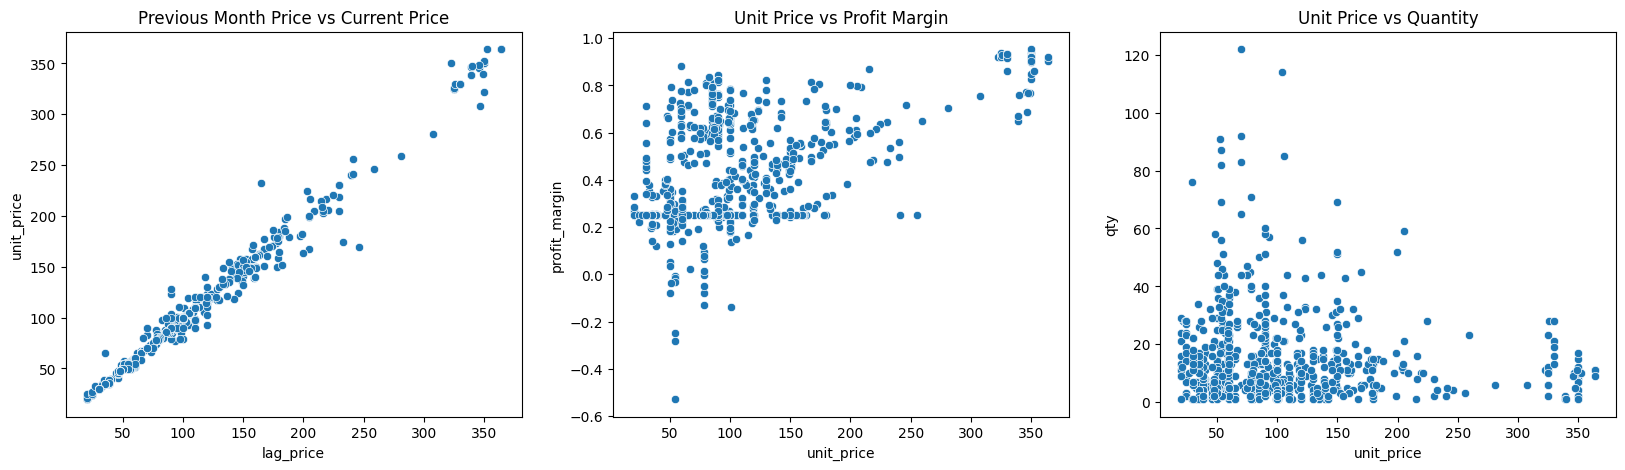

In [42]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(x=df['lag_price'], y=df['unit_price'])
plt.title("Previous Month Price vs Current Price")

plt.subplot(1,3,2)
sns.scatterplot(x=df['unit_price'], y=df['profit_margin'])
plt.title("Unit Price vs Profit Margin")

plt.subplot(1,3,3)
sns.scatterplot(x='unit_price', y='qty', data=df)
plt.title("Unit Price vs Quantity")

plt.show()

- **Previous Month Price vs Current Price:** There is a strong positive correlation, indicating that prices remain relatively stable month over month with minor fluctuations.  

- **Unit Price vs Profit Margin:** `Higher unit prices tend to have higher profit margins`, but there is notable variability, suggesting that pricing strategies impact profitability differently across products.

- **Unit Price vs Quantity:** There is a **negative relationship** between **unit price** and **quantity sold**, indicating that as the price increases, the quantity sold generally decreases, which aligns with the law of demand.


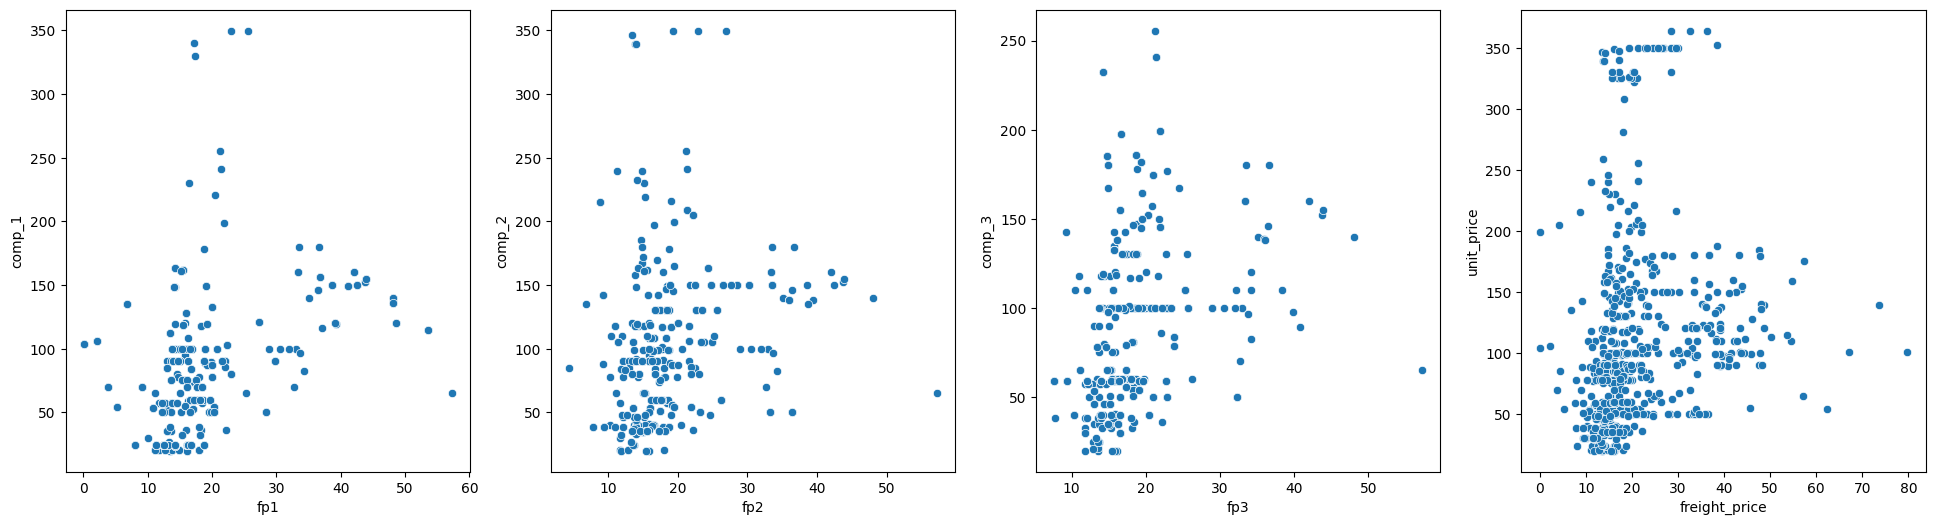

In [43]:
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
sns.scatterplot(data=df, x='fp1', y='comp_1')

plt.subplot(1,4,2)
sns.scatterplot(data=df, x='fp2', y='comp_2')

plt.subplot(1,4,3)
sns.scatterplot(data=df, x='fp3', y='comp_3')

plt.subplot(1,4,4)
sns.scatterplot(data=df,x='freight_price', y='unit_price')

plt.show()

- While competitors share **similar price clusters**, there are **differences in price spread and outliers**, suggesting **some brands focus on premium products while others compete in mid-range pricing.**

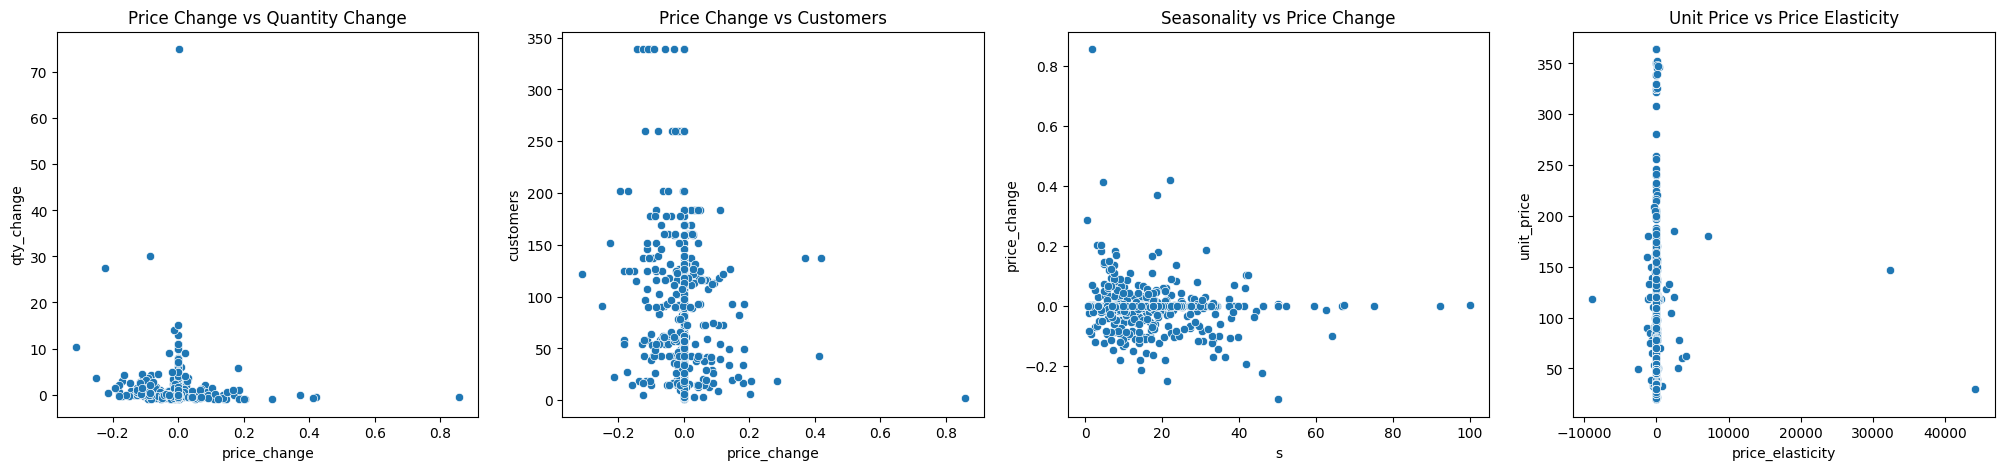

In [44]:
plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
sns.scatterplot(data=df, x='price_change', y='qty_change')
plt.title("Price Change vs Quantity Change")

plt.subplot(1,4,2)
sns.scatterplot(data=df, x='price_change', y='customers')
plt.title("Price Change vs Customers")

plt.subplot(1,4,3)
sns.scatterplot(data=df, y='price_change', x='s')
plt.title("Seasonality vs Price Change")

plt.subplot(1,4,4)
sns.scatterplot(data=df, y='unit_price', x='price_elasticity')
plt.title("Unit Price vs Price Elasticity")

plt.show()

- **Price Change vs Quantity Change:** There is no strong correlation; most quantity changes are small regardless of price changes, but a few extreme cases exist.  
- **Price Change vs Customers:** The number of customers remains relatively stable despite price changes, indicating that price changes alone may not significantly influence customer demand.  
- **Seasonality vs Price Change:** Price changes tend to be small across different seasonality values, but a few higher seasonal periods show more price variability.
- **Unit Price vs Price Elasticity:** There is no correlation between unit_price and price_elasticity as most of the values has 0 price_elasticity.

### Sales during weekend, weekdays and holidays

Text(0.5, 1.0, 'Average Sales for number of holidays in a month')

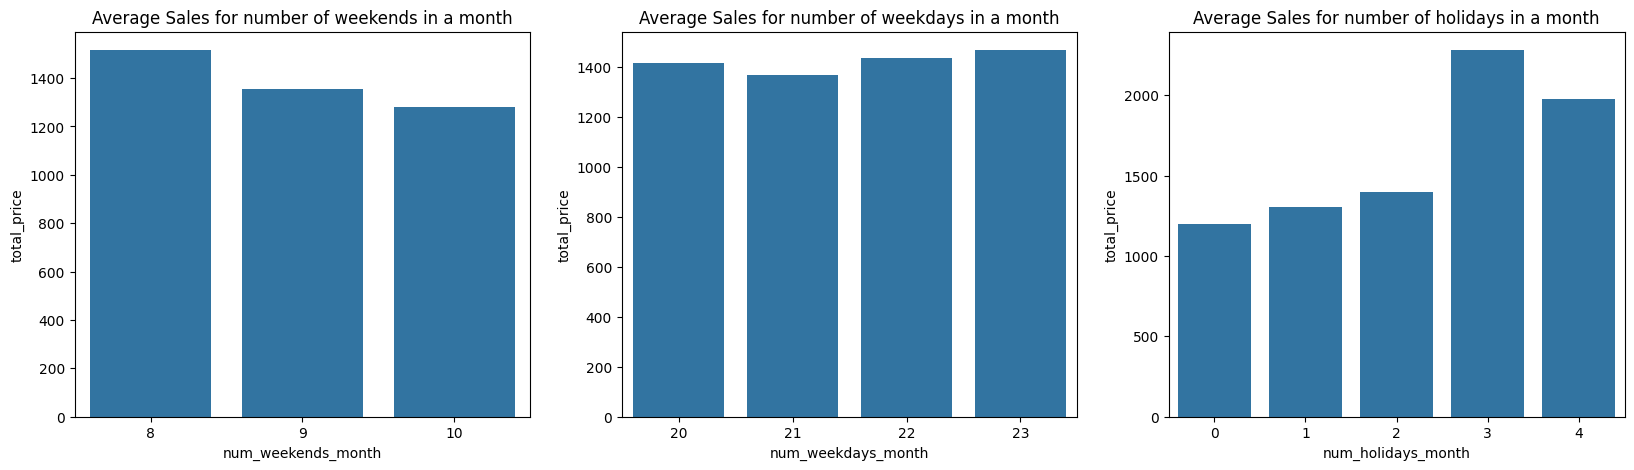

In [45]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(data=df.groupby('num_weekends_month')['total_price'].mean().reset_index(),
            x='num_weekends_month', y='total_price')
plt.title("Average Sales for number of weekends in a month")

plt.subplot(1,3,2)
sns.barplot(data=df.groupby('num_weekdays_month')['total_price'].mean().reset_index(),
            x='num_weekdays_month', y='total_price')
plt.title("Average Sales for number of weekdays in a month")

plt.subplot(1,3,3)
sns.barplot(data=df.groupby('num_holidays_month')['total_price'].mean().reset_index(),
            x='num_holidays_month', y='total_price')
plt.title("Average Sales for number of holidays in a month")

- **Average Sales for Number of Weekends in a Month:** Sales tend to be higher when there are fewer weekends, suggesting that weekends may not be the primary driver of sales.  
- **Average Sales for Number of Weekdays in a Month:** Sales generally increase as the number of weekdays increases, but this may not be the primary driver of sales.  
- **Average Sales for Number of Holidays in a Month:** Sales peak when there are three holidays, but too many holidays (four or more) may slightly reduce sales, possibly due to store closures or reduced shopping activity.

### Time Series Analysis

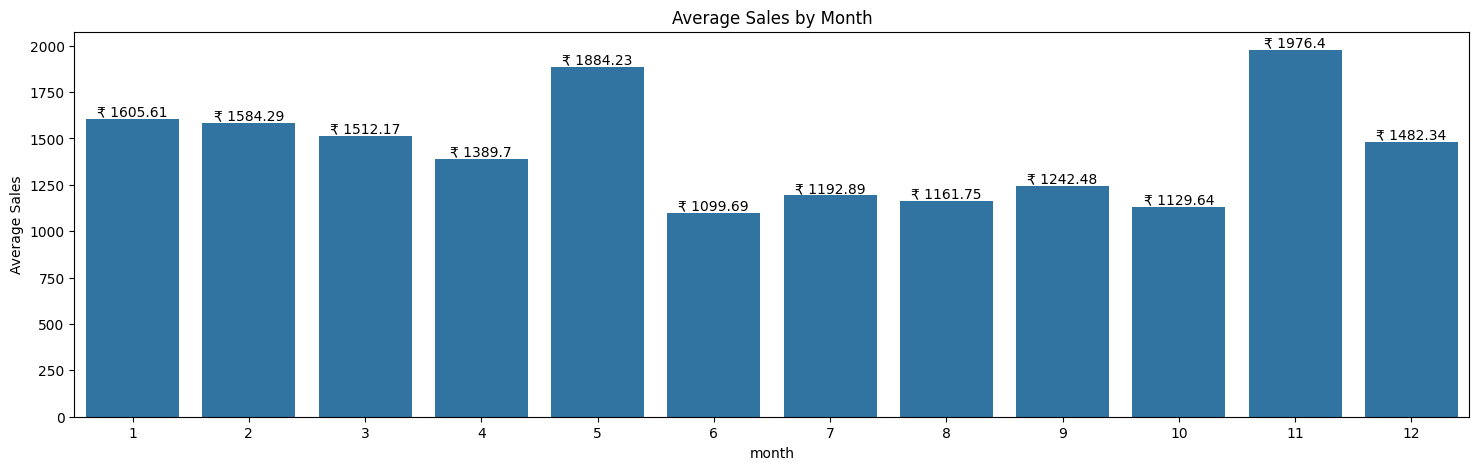

In [46]:
plt.figure(figsize=(18,5))
p = sns.barplot(data=df.groupby('month')['total_price'].mean().reset_index(),
            x='month', y='total_price')
for i in p.patches:
  p.text(i.get_x()+i.get_width()/2, i.get_height(), '₹ '+str(round(i.get_height(),2)), ha='center', va='bottom')
plt.title('Average Sales by Month')
plt.ylabel('Average Sales')
plt.show()

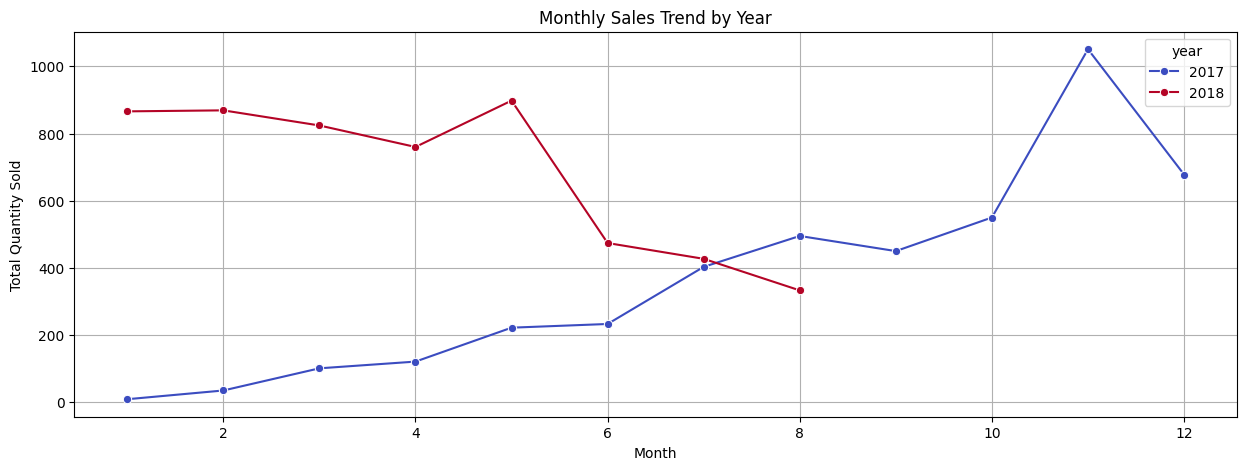

In [47]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df.groupby(['year', 'month'])['qty'].sum().reset_index(),
             x='month', y='qty', hue='year', marker='o', palette='coolwarm')
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.show()

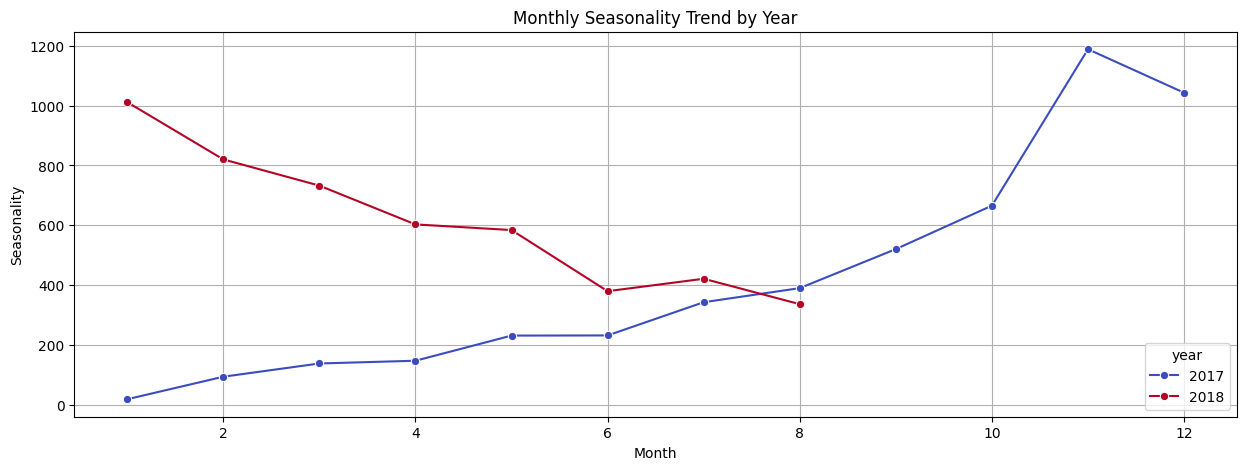

In [48]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df.groupby(['year', 'month'])['s'].sum().reset_index(),
             x='month', y='s', hue='year', marker='o', palette='coolwarm')
plt.title("Monthly Seasonality Trend by Year")
plt.xlabel("Month")
plt.ylabel("Seasonality")
plt.grid(True)
plt.show()

- **Average Sales by Month:** Sales peak in **May and November**, with **June having the lowest sales**, indicating seasonal demand fluctuations.  
- **Monthly Sales Trend by Year:** **2018 starts strong but declines mid-year,** whereas **2017 sees steady growth, peaking in November.**  
- **Monthly Seasonality Trend by Year:** **2018 has high early-year seasonality that declines,** while **2017 gradually increases, peaking in November–December.**  

## Handling Outliers

In [208]:
cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_weight_g',
    'customers', 's', 'volume', 'comp_1', 'comp_2', 'comp_3', 'lag_price',
    'est_cost_price', 'profit', 'profit_margin', 'price_elasticity']

df[cols].describe()

,qty,total_price,freight_price,unit_price,product_weight_g,customers,s,volume,comp_1,comp_2,comp_3,lag_price,est_cost_price,profit,profit_margin,price_elasticity
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.220453,20.682270,106.496800,1847.498521,81.028107,14.644970,10664.627219,79.452054,92.930079,84.182642,107.399684,30.782026,711.047284,0.421223,123.118185
std,15.443421,1699.375345,10.081817,76.182972,2274.808483,62.055560,11.930276,9172.801850,47.933358,49.481269,47.745789,76.974657,27.119649,1158.570211,0.231523,2179.753163
min,1.000000,19.900000,0.000000,19.900000,100.000000,1.000000,0.484262,640.000000,19.900000,19.900000,19.900000,19.850000,-8.480000,-121.359622,-0.527557,-8842.508843
25%,4.000000,333.700000,14.761912,53.900000,348.000000,34.000000,7.510204,3510.000000,49.910000,53.900000,53.785714,55.668750,9.993846,104.300257,0.250000,-1.502821
50%,10.000000,807.890000,17.518472,89.900000,950.000000,62.000000,11.316760,8000.000000,69.900000,89.990000,59.900000,89.900000,23.827500,298.948094,0.333790,0.000000
75%,18.000000,1887.322500,22.713558,129.990000,1850.000000,116.000000,17.745704,15750.000000,104.256549,117.888889,99.990000,129.990000,53.811250,755.699770,0.613809,0.000000
max,122.000000,12095.000000,79.760000,364.000000,9750.000000,339.000000,100.000000,32736.000000,349.900000,349.900000,255.610000,364.000000,170.480833,9627.712500,0.953575,44175.000000


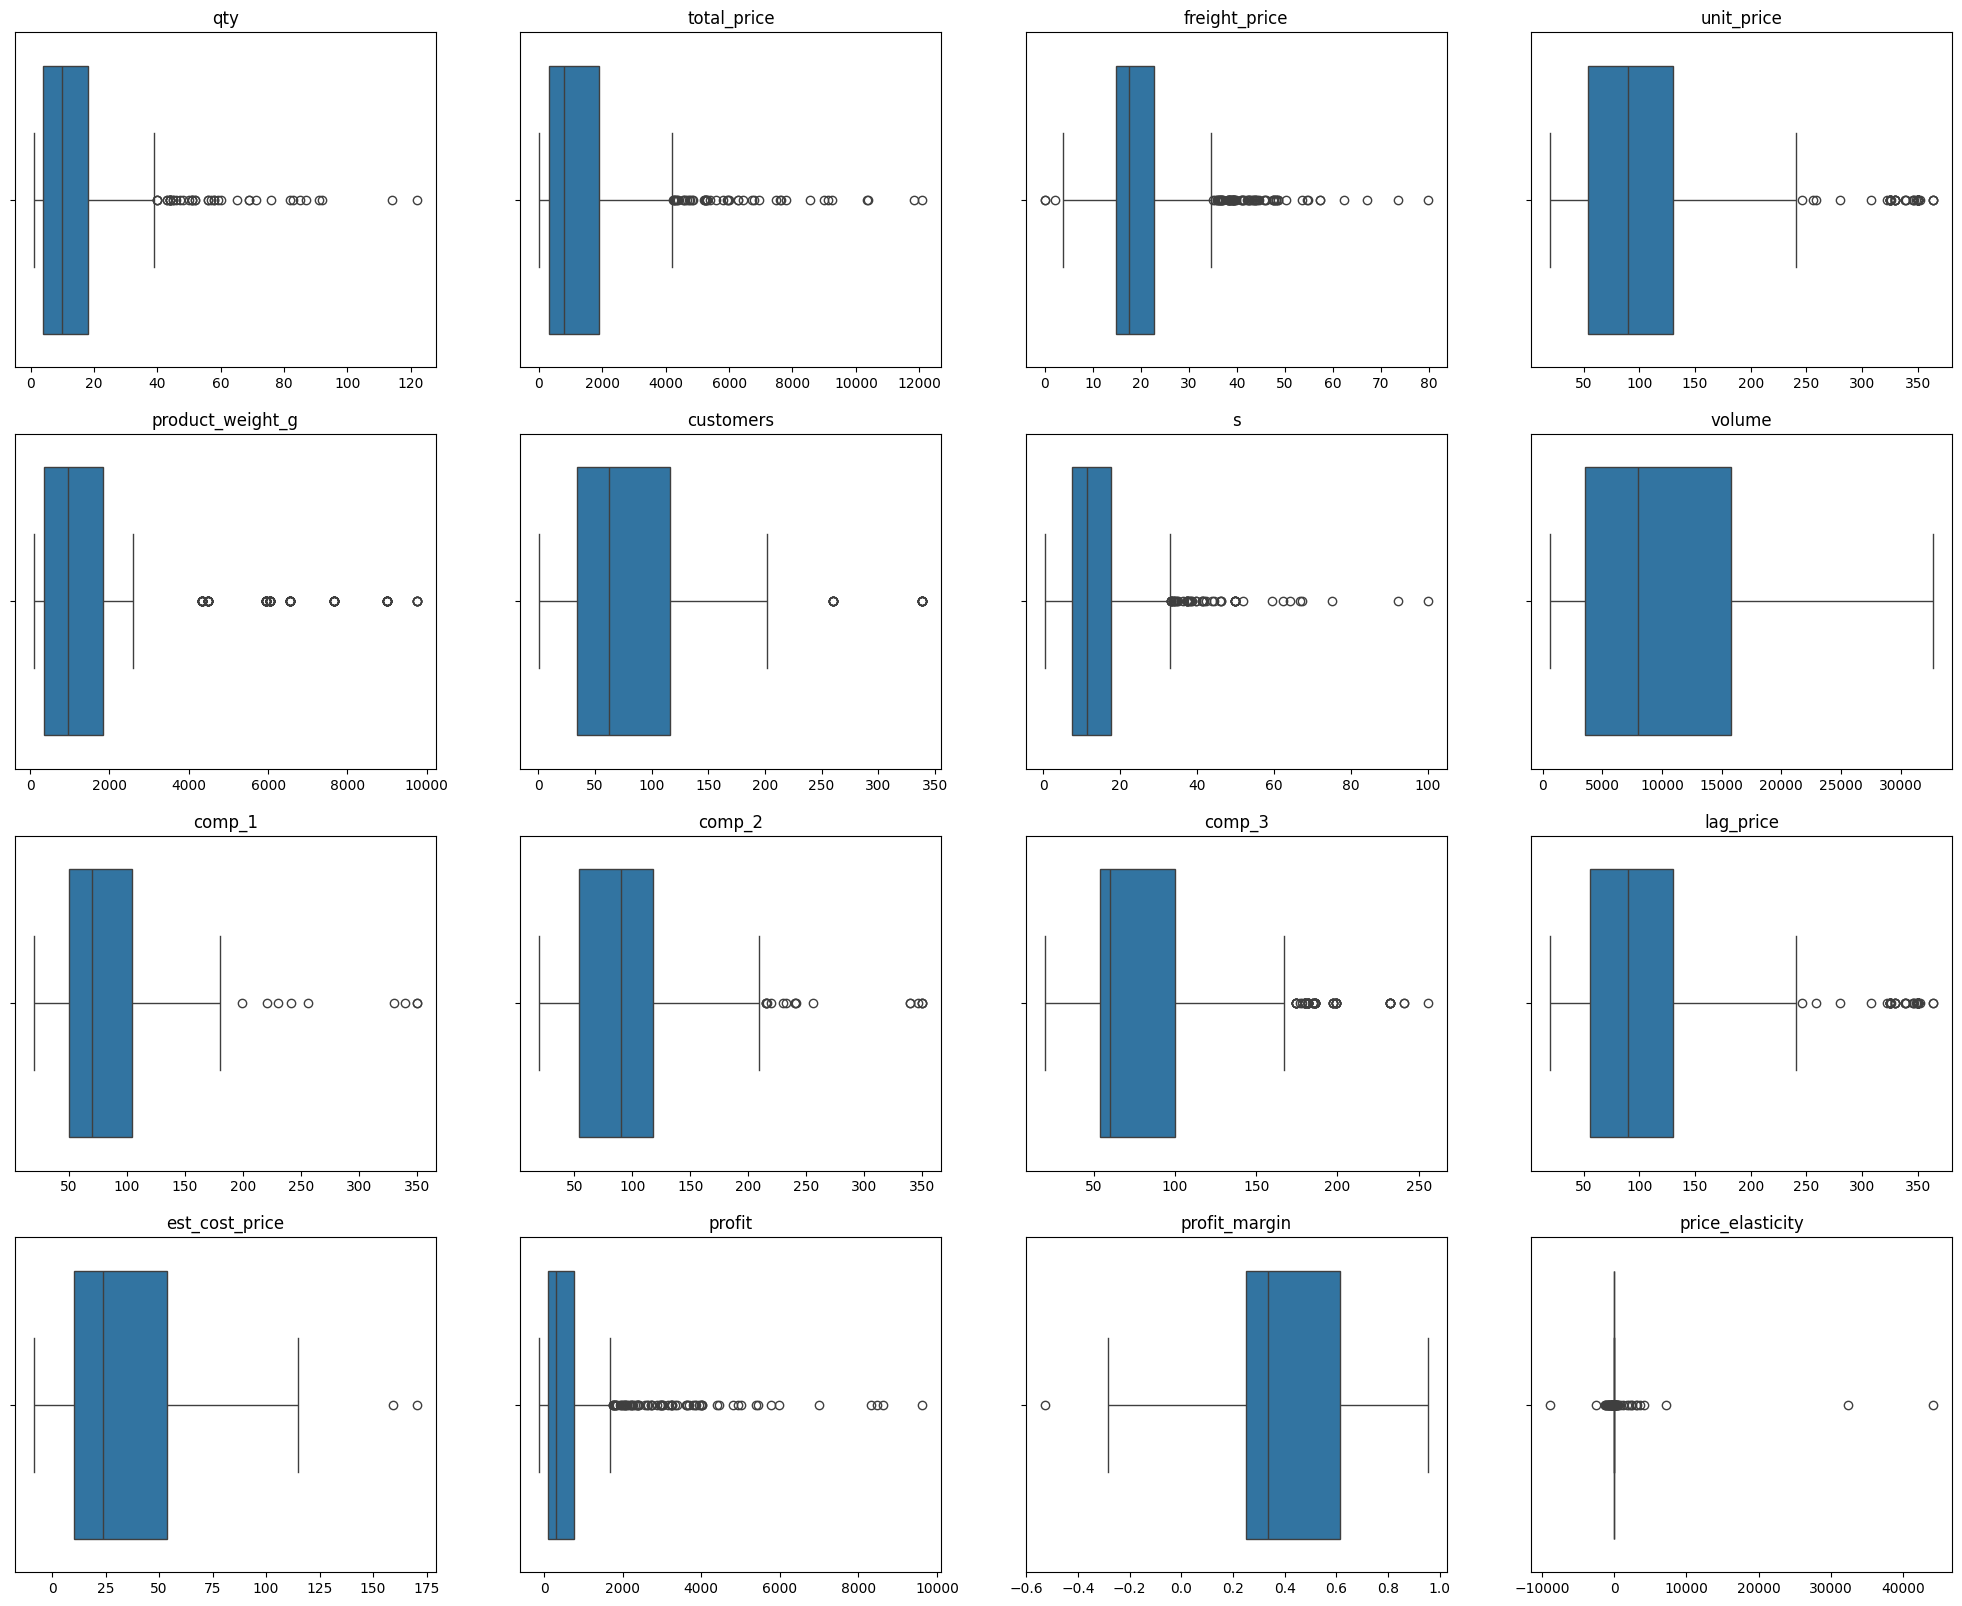

In [209]:
plt.figure(figsize=(25,20))
for i, col in enumerate(cols):
  plt.subplot(4,4,i+1)
  sns.boxplot(data=df, x=col)
  plt.xlabel('')
  plt.title(col)
plt.show()

In [210]:
df2=df.copy()

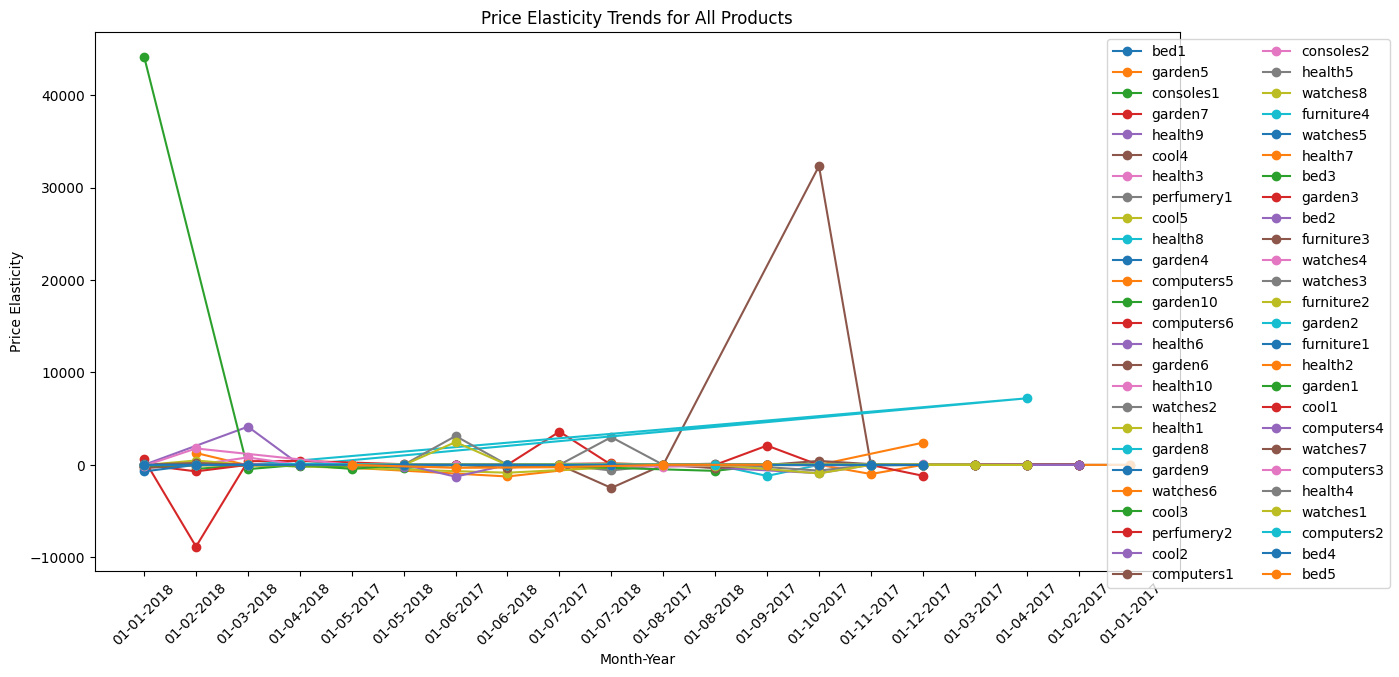

In [211]:
plt.figure(figsize=(14, 7))

for product in df2["product_id"].unique():
    df_product = df2[df2["product_id"] == product].sort_values(by="month_year")
    plt.plot(df_product["month_year"], df_product["price_elasticity"], marker="o", linestyle="-", label=product)

plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Price Elasticity")
plt.title("Price Elasticity Trends for All Products")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), ncol=2)
plt.show()

- Some products have extreme spikes (e.g., elasticity jumps to 40,000 or drops to -10,000). These are likely data errors or anomalies that need handling.

- Most products show relatively stable trends, meaning the price elasticity does not change drastically over time.

- A few products show genuine fluctuations, which means replacing elasticity with a static median might remove useful signals. So we can replace only extreme outliers with median of that product.

In [212]:
# Calculate IQR per product
Q1 = df2.groupby("product_id")["price_elasticity"].transform(lambda x: x.quantile(0.25))
Q3 = df2.groupby("product_id")["price_elasticity"].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define Outlier Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Compute Median per product
median_price_elasticity = df2.groupby("product_id")["price_elasticity"].transform("median")

# Replace only outliers with the median
df2.loc[(df2["price_elasticity"] < lower_bound) | (df2["price_elasticity"] > upper_bound), "price_elasticity"] = median_price_elasticity


In [213]:
# applying log transformation for right skewed data
cols = ['qty', 'total_price', 'freight_price', 'unit_price', 's',
        'product_weight_g', 'comp_1', 'comp_2', 'comp_3', 'lag_price']

# to handle zeroes
for col in cols:
    df2[col] = np.log(df2[col] + 1)

In [214]:
# since negative values are present
df2['profit'] = np.log(df2['profit'] - df2['profit'].min() + 1)
df2['est_cost_price'] = np.log(df2['est_cost_price'] - df2['est_cost_price'].min() + 1)

In [215]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (Cap extreme values at 5% lower and upper percentile)
df2['profit_margin'] = winsorize(df2['profit_margin'], limits=[0.05, 0.05])
df2['customers'] = winsorize(df2['customers'], limits=[0.05, 0.05])

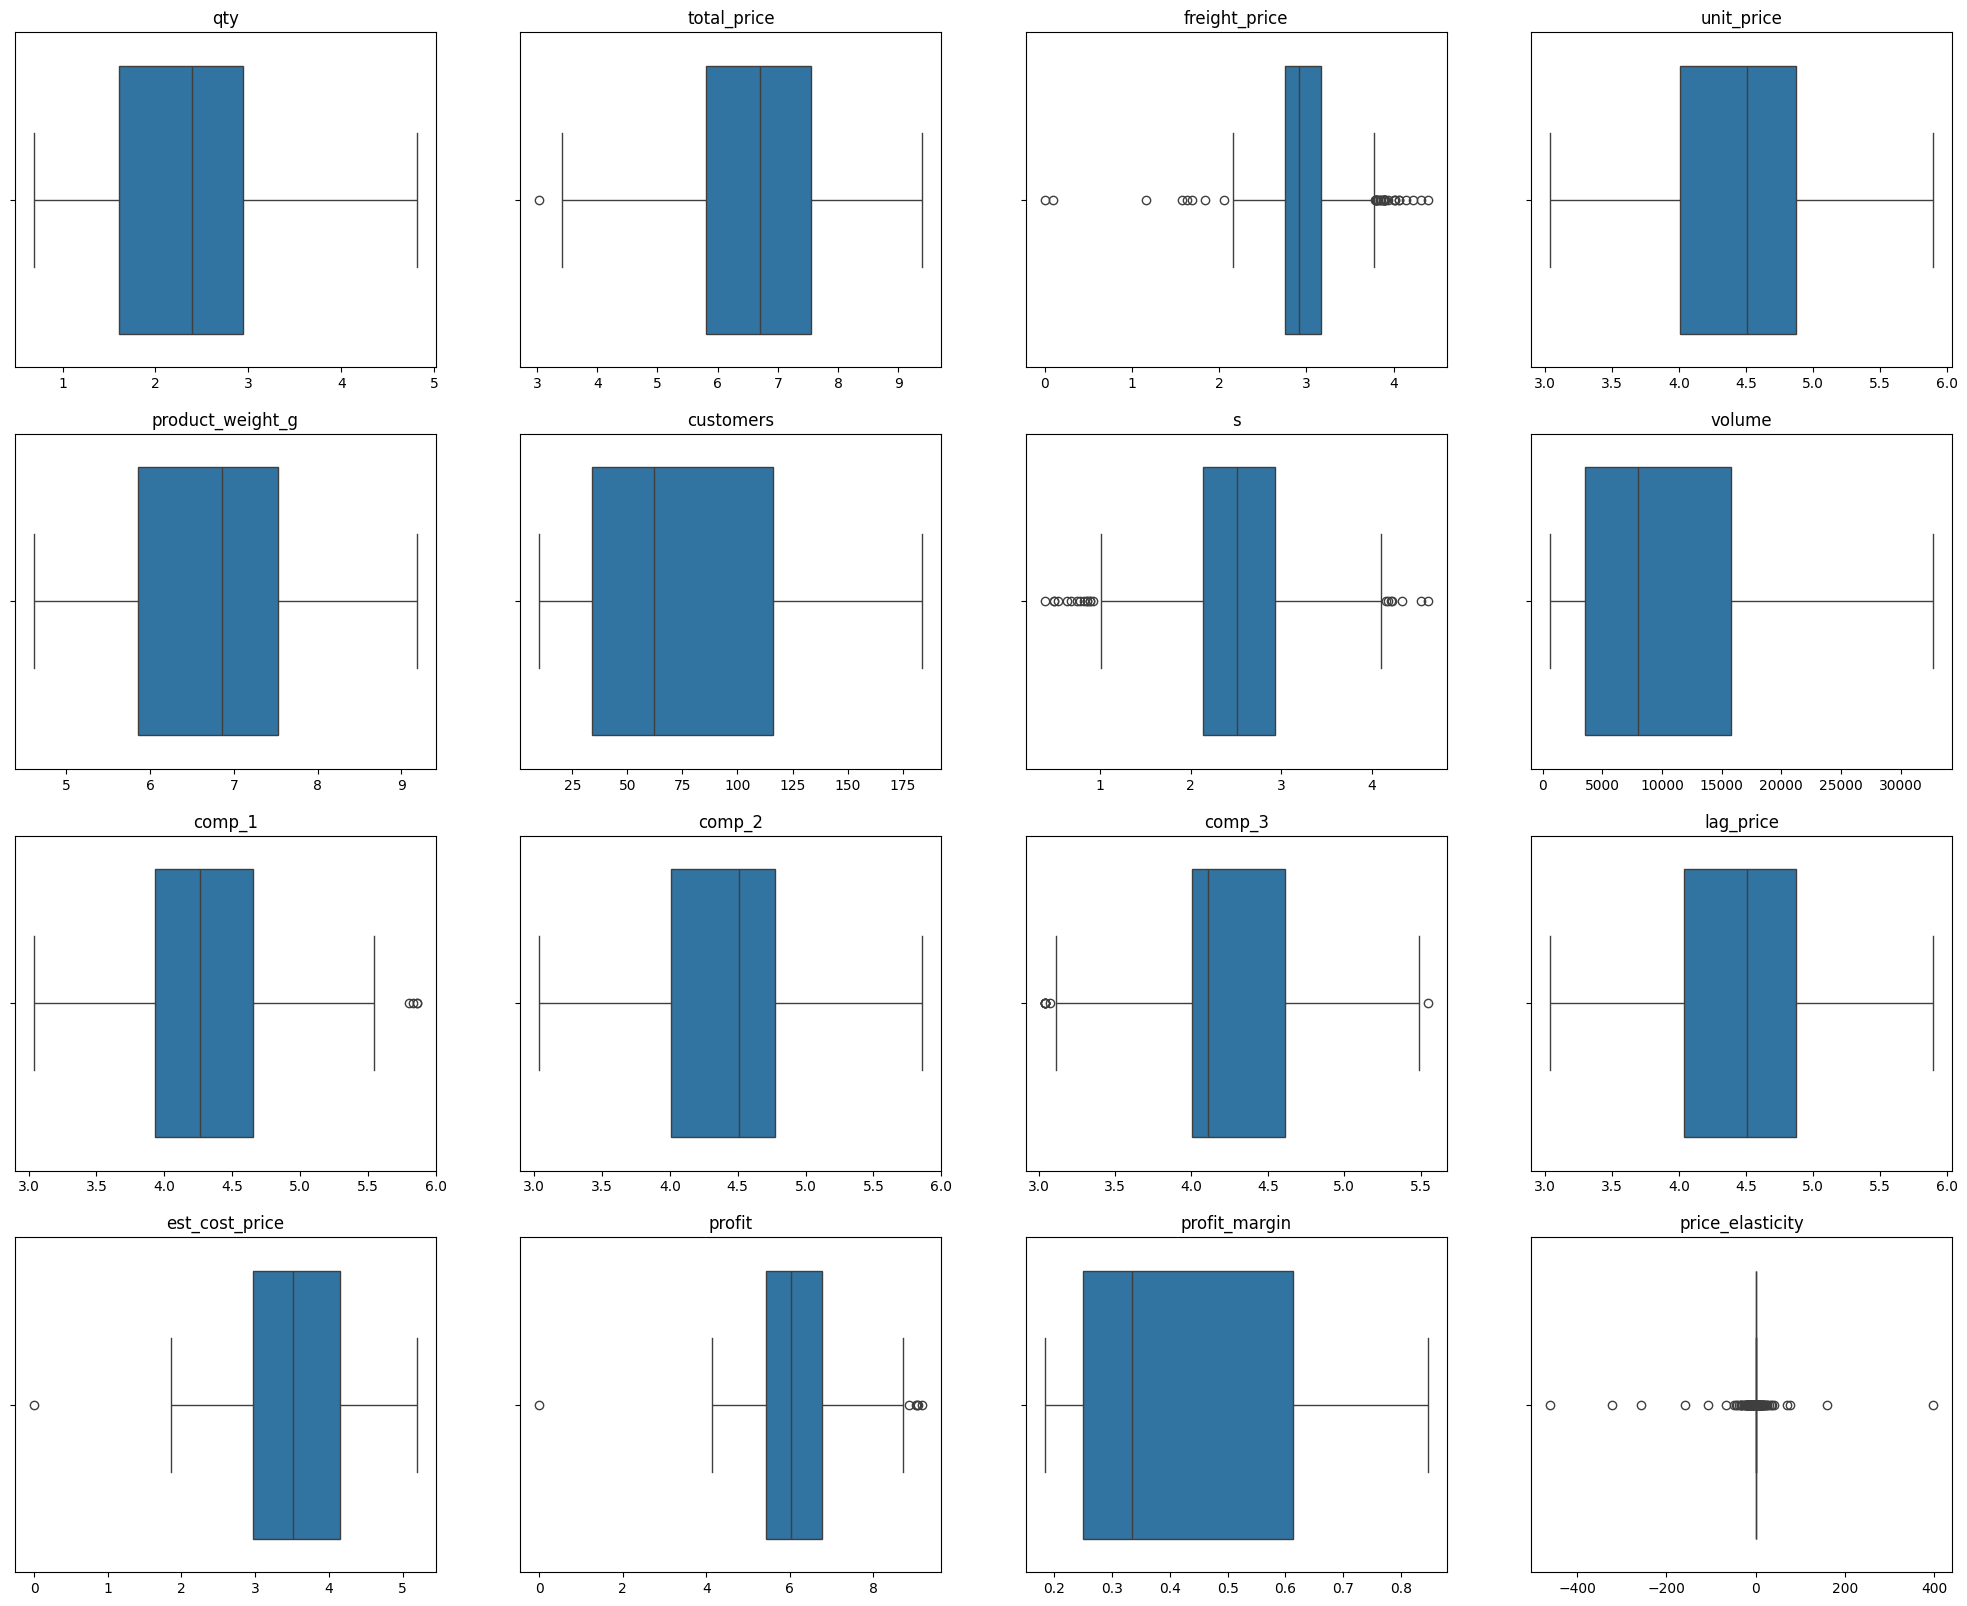

In [216]:
cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_weight_g',
    'customers', 's', 'volume', 'comp_1', 'comp_2', 'comp_3', 'lag_price',
    'est_cost_price', 'profit', 'profit_margin', 'price_elasticity']

plt.figure(figsize=(25,20))
for i, col in enumerate(cols):
  plt.subplot(4,4,i+1)
  sns.boxplot(data=df2, x=col)
  plt.xlabel('')
  plt.title(col)
plt.show()

## Feature Encoding

In [217]:
df2.select_dtypes(include='object').columns

Index(['product_id', 'product_category_name', 'month_year', 'season'], dtype='object')

In [218]:
# drop month_year since we already have month and year columns seperately
df2.drop('month_year', axis=1, inplace=True)

In [219]:
# Target encoding for product_id
product_price_map = df2.groupby('product_id')['unit_price'].mean()
df2['product_id'] = df2['product_id'].map(product_price_map)

In [220]:
# Target encoding for product_category_name
category_price_map = df2.groupby('product_category_name')['unit_price'].mean()
df2['product_category_name'] = df2['product_category_name'].map(category_price_map)

In [221]:
# Ordinal encoding for season
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df2['season'] = df2['season'].map(season_mapping)

## Correlation Analysis

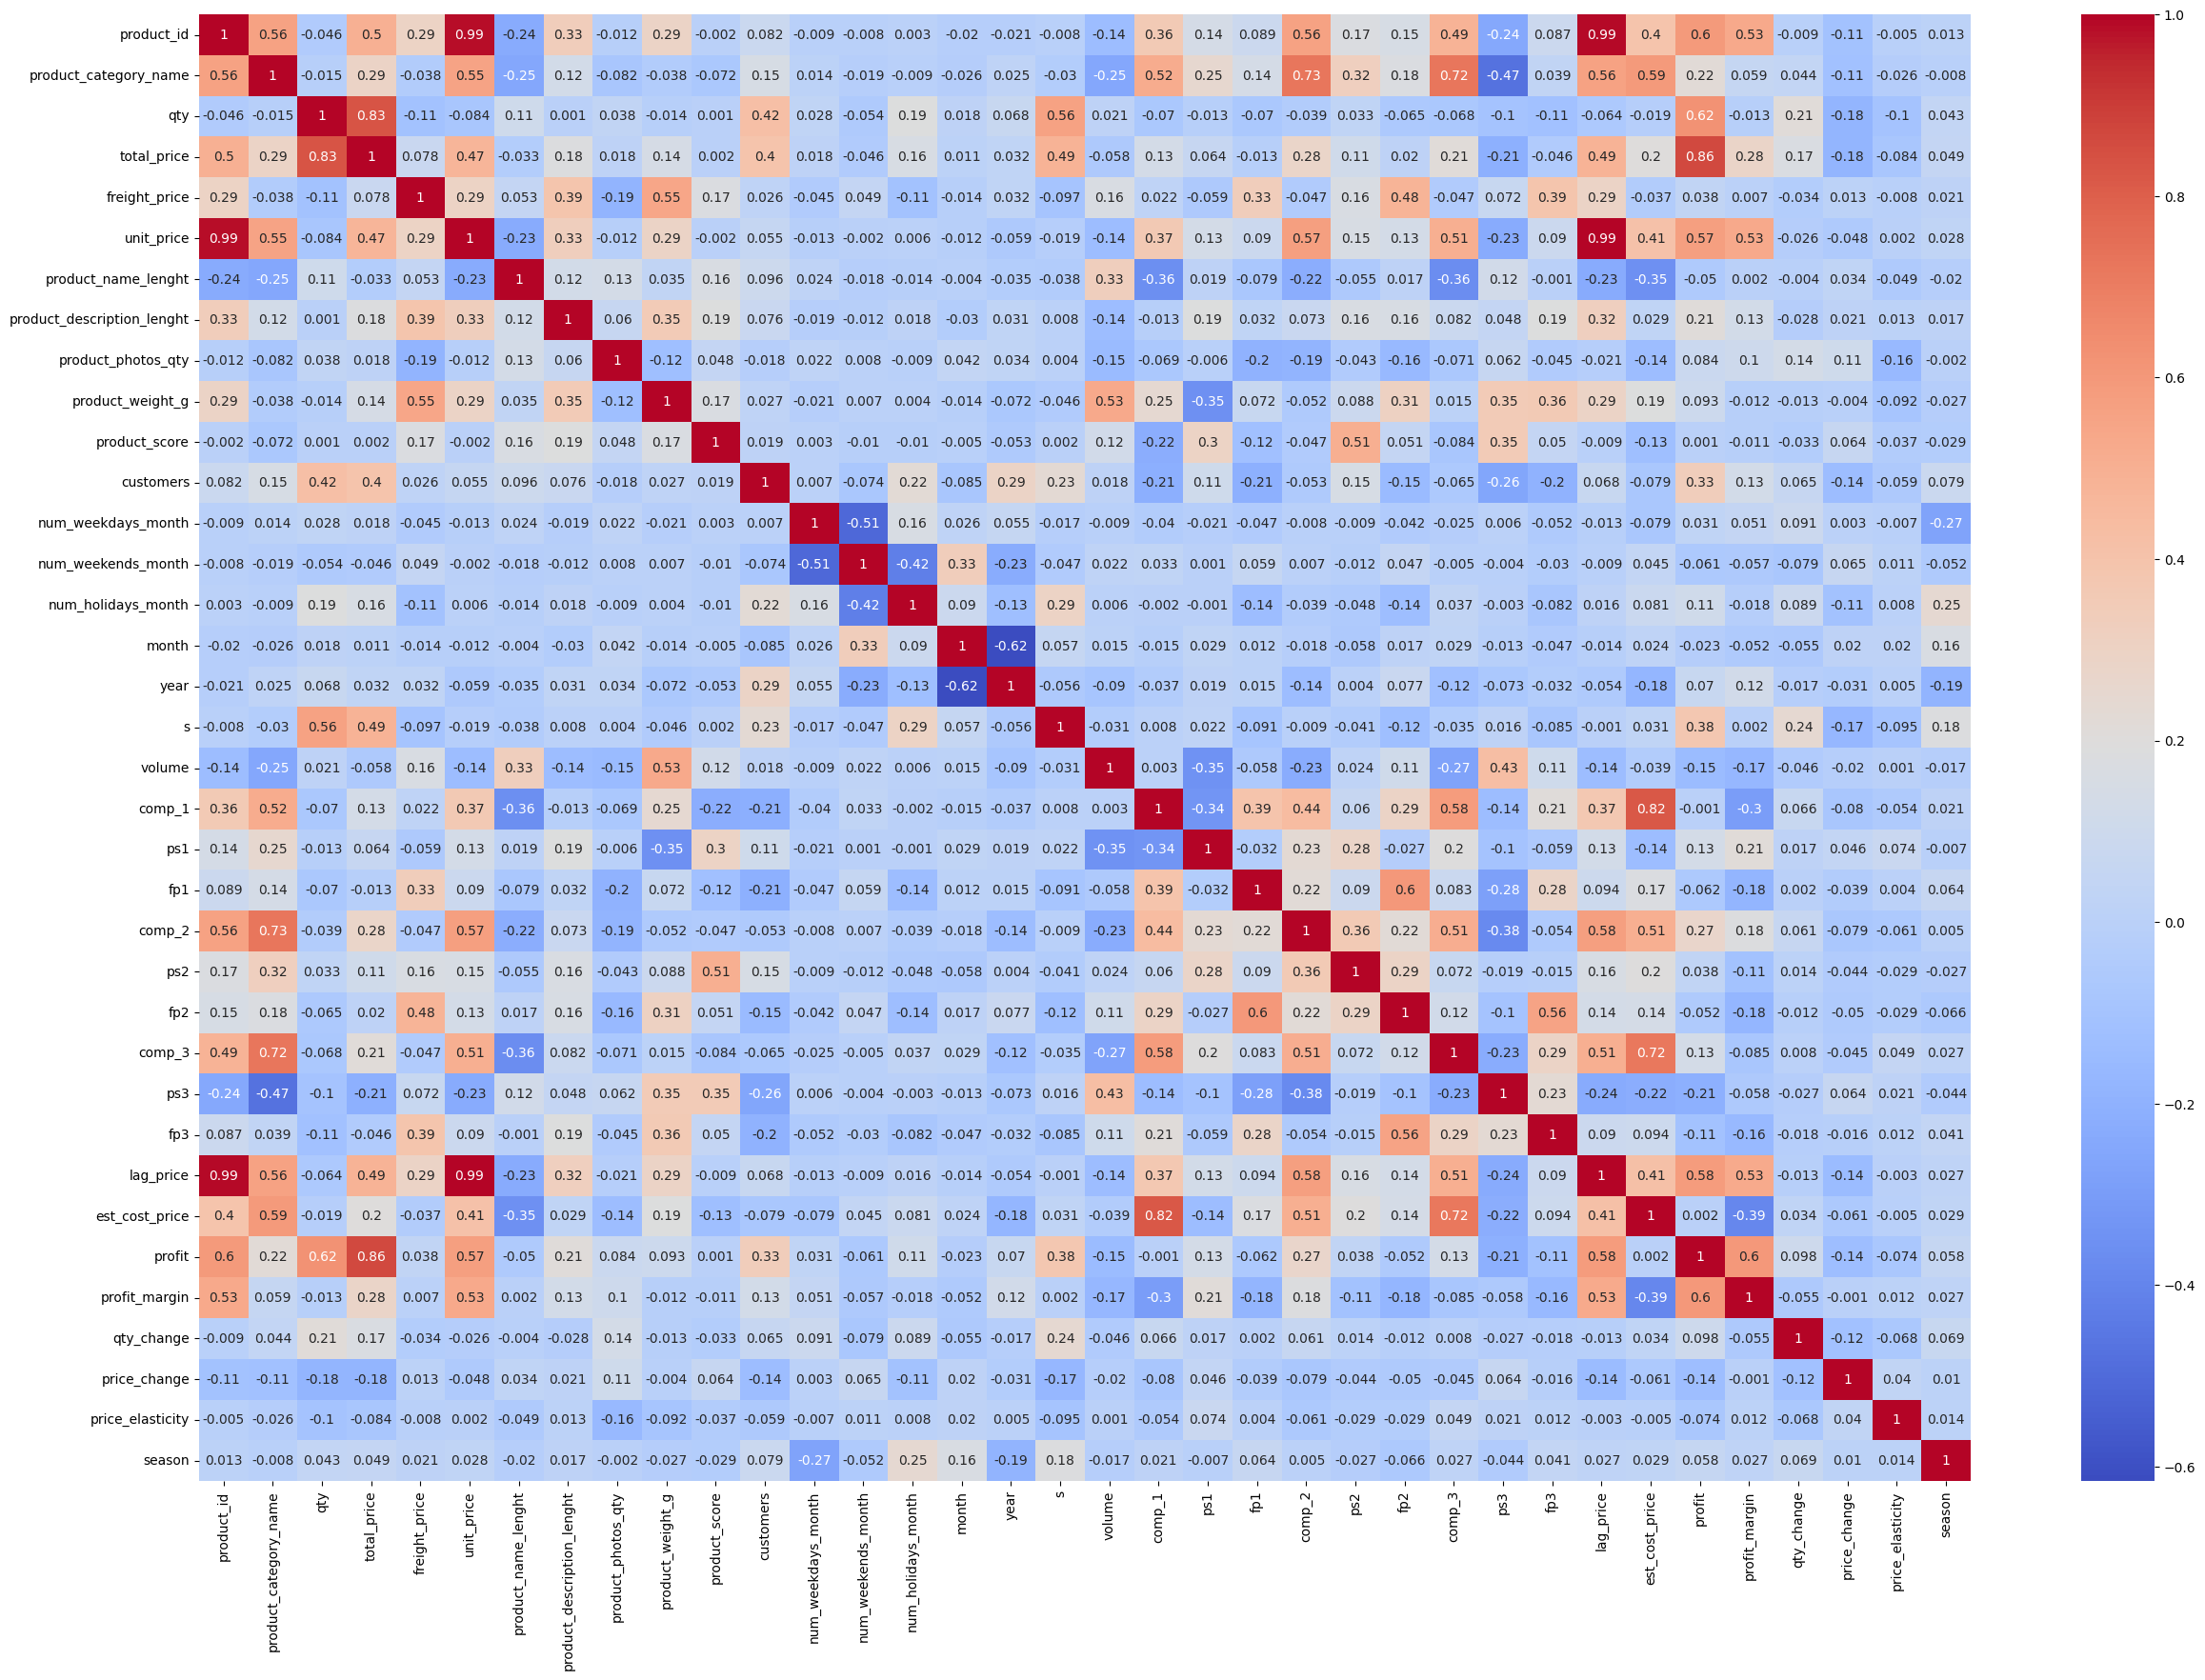

In [222]:
corr_matrix = df2.corr().round(3)

plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [223]:
corr_matrix['unit_price'].abs().sort_values(ascending=False)

,unit_price
unit_price,1.000
lag_price,0.995
product_id,0.987
profit,0.575
comp_2,0.574
product_category_name,0.553
profit_margin,0.531
comp_3,0.505
total_price,0.473
est_cost_price,0.412


- `lag_price`, `product_id`, `profit`, `comp_2`, `product_category_name` and `profit_margin` are having high correlation with `unit_price`.
- `num_weekdays_month`, `product_photos_qty`, `month`, `num_holidays_month`, `product_score`, `num_weekends_month` and `price_elasticity` has weak correlation with `unit_price`.

In [224]:
high_corr_pairs = corr_matrix[(corr_matrix.abs() > 0.8) & (corr_matrix.abs() < 1.0)]
high_corr_pairs.unstack().dropna().reset_index()

,level_0,level_1,0
0,product_id,unit_price,0.987
1,product_id,lag_price,0.988
2,qty,total_price,0.835
3,total_price,qty,0.835
4,total_price,profit,0.862
5,unit_price,product_id,0.987
6,unit_price,lag_price,0.995
7,comp_1,est_cost_price,0.823
8,lag_price,product_id,0.988
9,lag_price,unit_price,0.995


- **product_id and lag_price are highly correlated**, we can keep one and drop other.
- **qty and total_price are highly correlated**, we can keep one and drop other.
- **profit and total_price are highly correlated**, we can keep one and drop other.

In [225]:
# drop unnecessary columns and multi collinear columns
cols = ['num_weekdays_month', 'num_holidays_month', 'num_weekends_month',
        'total_price', 'lag_price', 'price_change', 'qty_change']
df2.drop(columns=cols, inplace=True)

## Model Training

In [226]:
X, y = df2.drop(columns=['unit_price']), df2['unit_price']

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
X_train.shape

(540, 28)

In [229]:
X_test.shape

(136, 28)

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Selection

In [231]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.base import clone

# Define Adjusted R² function
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n, k = X.shape
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define Cross-Validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE to select features
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Store adjusted R² scores
adj_r2_scores = []

# Perform Cross-Validation manually (since sklearn doesn’t support Adjusted R² directly)
for train_idx, val_idx in cv.split(X_train_rfe):
    X_train_fold, X_val_fold = X_train_rfe[train_idx], X_train_rfe[val_idx]
    y_train_fold, y_val_fold = y_train.to_numpy()[train_idx], y_train.to_numpy()[val_idx]

    # Clone and fit model
    model_fold = clone(model)
    model_fold.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_val_pred = model_fold.predict(X_val_fold)

    # Compute Adjusted R²
    adj_r2 = adjusted_r2_score(y_val_fold, y_val_pred, X_val_fold)
    adj_r2_scores.append(adj_r2)

# Compute mean Adjusted R²
mean_adj_r2 = np.mean(adj_r2_scores)
print(f"Mean Adjusted R² Score from Cross-Validation: {mean_adj_r2:.4f}")

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

Mean Adjusted R² Score from Cross-Validation: 0.9865
Selected Features: ['product_id', 's', 'volume', 'comp_1', 'fp1', 'comp_2', 'fp2', 'comp_3', 'est_cost_price', 'profit_margin']


### Comparing Models

In [232]:
X_train_selected = pd.DataFrame(X_train_scaled, columns=X_train.columns)[selected_features]
X_test_selected = pd.DataFrame(X_test_scaled, columns=X_test.columns)[selected_features]

In [241]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Define Adjusted R² function
def adjusted_r2(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n, k = X.shape
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define Cross-Validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

for name, model in models.items():

    adj_r2_scores = []

    for train_idx, val_idx in cv.split(X_train_selected):
        X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Clone and fit the model
        model_fold = clone(model)
        model_fold.fit(X_train_fold, y_train_fold)

        # Predict and compute Adjusted R²
        y_val_pred = model_fold.predict(X_val_fold)
        adj_r2 = adjusted_r2(y_val_fold, y_val_pred, X_val_fold)
        adj_r2_scores.append(adj_r2)

    # Compute mean Adjusted R²
    mean_adj_r2 = np.mean(adj_r2_scores)
    results[name] = mean_adj_r2

    print(f"{name} => Mean CV Adjusted R²: {mean_adj_r2:.4f}")

Random Forest => Mean CV Adjusted R²: 0.9865
Gradient Boosting => Mean CV Adjusted R²: 0.9832
XGBoost => Mean CV Adjusted R²: 0.9852


we can see that Random Forest has highest score among other models, so we can choose `Random Forest`.

### Hyperparameter Tuning

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearch
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit on selected features
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
y_pred_best = best_rf.predict(X_test_selected)
best_r2 = r2_score(y_test, y_pred_best)
best_adj_r2 = 1 - (1 - best_r2) * (len(y_test) - 1) / (len(y_test) - X_test_selected.shape[1] - 1)
best_rmse = mean_squared_error(y_test, y_pred_best)
best_mae = mean_absolute_error(y_test, y_pred_best)

print(f"\nBest Tuned Random Forest Performance:")
print(f"Adjusted R² Score: {best_adj_r2:.4f}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAE: {best_mae:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Tuned Random Forest Performance:
Adjusted R² Score: 0.9917
RMSE: 0.0034
MAE: 0.0303


In [247]:
# final Model
best_rf

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

# Insights and Recommendations

## Insights

- **Sales & Pricing Trends**: Sales vary widely (`qty` max = **122**), with unit prices from **USD 19.90 to USD 364**. Some bulk purchases drive high revenues (Max = **USD 12,095**). Profit margins average **42%**, but extreme cases reach **95%**, indicating potential cost underestimation.  
- **Profitability & Elasticity**: Some products sell at a **loss (Min = -USD 115.9)**, requiring price adjustments. Most products are **inelastic**, meaning demand is stable despite price changes; only `watches7` is elastic (**elasticity = 8.18**).  
- **Competitor & Freight Pricing**: Competitor prices are **similar (USD 80-USD 90 avg.)**, suggesting a competitive market. Some products have **high shipping costs (Max = USD 79.76)**, impacting profit margins.  
- **Top Categories & Products**: `Garden Tools` had the **highest sales (24.47%)**, but `Health & Beauty` led in **revenue (USD 212K) and profit (USD 174K)**. `health2` was the **top revenue generator (USD 63,885)**, while `consoles2` had the lowest (USD 2,384).  
- **Seasonality & Time Trends**: **Highest sales in Spring/Winter**, lowest in **Summer**. **May & November peak**, while **June has the lowest sales**. **More holidays (3-4) boost sales**, but weekends have little impact.  
- **Product Score & Photos**: Higher **product scores (above 4.0)** correlate with **higher sales**, but **outliers exist**. More **product photos (5-6) improve sales**, but some lower-photo products still sell well.  
- **Price vs Demand & Margins**: **Higher prices = lower quantity sold** (law of demand). **Premium products have higher profit margins**, but impact varies. **Price changes have minimal effect on demand**, except for a few outliers.  
- **Competitor Comparison**: Our **prices have a wider spread with more outliers**. **Freight costs are generally higher** than competitors. **Product scores are competitive but show more variation**.  
- **Key Feature Correlations**: `unit_price` is highly correlated with **lag_price, profit, competitor prices, product category, and profit margin**. **Weak correlations** exist with **weekdays, photos, month, holidays, and product score**.  
- **Feature Selection for Modeling**: Selected **10 key features** (`product_id`, `volume`, `profit_margin`, competitor prices, etc.) using Recursive Feature Elimination (RFE).  
- **Model Performance Comparison**: **Random Forest (0.9865 Adjusted R²) outperformed** Gradient Boosting (0.9832) and XGBoost (0.9852).  
- **Final Model Selection & Tuning**: **Random Forest chosen** due to **best performance**. Tuned with `max_depth=20`, `n_estimators=200`, `min_samples_split=2`, `min_samples_leaf=1`.  
- **Final Model Performance**: **Adjusted R² = 0.9917**, **RMSE = 0.0034**, **MAE = 0.0303** → **Highly accurate model with low error rates**.

## Recommendations

- **Optimize Pricing Strategy**: Adjust prices for **high-margin products** to stay competitive and reconsider pricing for **low-margin, high-volume items** like `Garden Tools`.  
- **Reduce Freight Costs**: Evaluate **shipping partnerships** or optimize **logistics strategies** to lower high freight costs (**max = USD 79.76**), which impact profit margins.  
- **Manage Seasonal Demand**: Capitalize on peak sales in **Spring & Winter** by running promotions, while adjusting inventory for slower Summer months.  
- **Focus on Profitable Categories**: Prioritize `Health & Beauty` and `Consoles & Games` since they generate **high profit margins**, despite lower sales volume.  
- **Enhance Product Listings**: Increase **high-quality product photos (5-6 per listing)** and highlight **top-rated products (4.0+ score)** to drive more sales.  
- **Reassess Unprofitable Products**: Investigate products sold at a **loss (e.g., watches3, consoles2)** and either **adjust pricing, renegotiate costs, or discontinue them**.  
- **Monitor Price Elasticity**: Since **most products are inelastic**, frequent price changes may not impact demand significantly, except for `watches7`, which should be **carefully priced**.  
- **Leverage Competitor Insights**: Keep an eye on **competitor pricing (avg. USD 80-90)** to stay competitive while ensuring profitability.  
- **Seasonal Promotions & Discounts**: Offer targeted **holiday discounts (3-holiday months boost sales)** and leverage **high-sales months (May, November)** for marketing campaigns.